    
# Perform EDA on North Carolina Crime Rate

## **Data Description:**

The dataset contains the data for **crime rate in the state of North Carolina**  aggregated by county.



**Description:**

- A panel of 90 observations from 1981 to 1987.
- Number of observations: 630.
- Observation type: Regional.
- Country: United States.

**Usage:**

- `data(Crime)`

**Format:**

A DataFrame containing:

- **county**: County identifier.
- **year**: Year from 1981 to 1987.
- **crmrte**: Crimes committed per person.
- **prbarr**: 'Probability' of arrest.
- **prbconv**: 'Probability' of conviction.
- **prbpris**: 'Probability' of prison sentence.
- **avgsen**: Average sentence, in days.
- **polpc**: Police per capita.
- **density**: People per square mile.
- **taxpc**: Tax revenue per capita.
- **region**: One of 'other', 'west', or 'central'.
- **smsa**: 'Yes' or 'No' if in SMSA.
- **pctmin**: Percentage minority in 1980.
- **wcon**: Weekly wage in construction.
- **wtuc**: Weekly wage in transportation, utilities, communication.
- **wtrd**: Weekly wage in wholesale and retail trade.
- **wfir**: Weekly wage in finance, insurance, and real estate.
- **wser**: Weekly wage in the service industry.
- **wmfg**: Weekly wage in manufacturing.
- **wfed**: Weekly wage of federal employees.
- **wsta**: Weekly wage of state employees.
- **wloc**: Weekly wage of local government employees.
- **mix**: Offense mix: face-to-face/other. clear and easy to read in a notebook setting.

## Objective:

1. To do a **univariate** and **bivariate exploratory analysis** of data and report the findings. <br/>
2. To develop a suitable **linear model with crmrte as the dependent variable** and explain the various aspects of the model.

## 1. Load Data

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load haberman.csv into a pandas dataFrame.
crimeData = pd.read_csv("https://www.stat.auckland.ac.nz/~wild/data/Rdatasets/csv/Ecdat/Crime.csv")

In [5]:
# (Q) how many data-points and features?
print(crimeData.shape)

(630, 24)


In [6]:
# See the input data.
crimeData.head()

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,...,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
0,1,81,0.039885,0.289696,0.402062,0.472222,5.61,0.001787,2.307159,25.69763,...,333.6209,182.3330,272.4492,215.7335,229.12,409.37,236.24,231.47,0.099918,0.087697
1,1,82,0.038345,0.338111,0.433005,0.506993,5.59,0.001767,2.330254,24.87425,...,369.2964,189.5414,300.8788,231.5767,240.33,419.70,253.88,236.79,0.103049,0.086377
2,1,83,0.030305,0.330449,0.525703,0.479705,5.80,0.001836,2.341801,26.45144,...,1394.8030,196.6395,309.9696,240.1568,269.70,438.85,250.36,248.58,0.080679,0.085091
3,1,84,0.034726,0.362525,0.604706,0.520104,6.89,0.001886,2.346420,26.84235,...,398.8604,200.5629,350.0863,252.4477,281.74,459.17,261.93,264.38,0.078504,0.083833
4,1,85,0.036573,0.325395,0.578723,0.497059,6.55,0.001924,2.364896,28.14034,...,358.7830,206.8827,383.0707,261.0861,298.88,490.43,281.44,288.58,0.093249,0.082307


# 2. Data Analysis & Data Cleaning

In [8]:
# Check characteristics of data.
crimeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 24 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   county   630 non-null    int64  
 1   year     630 non-null    int64  
 2   crmrte   630 non-null    float64
 3   prbarr   630 non-null    float64
 4   prbconv  630 non-null    float64
 5   prbpris  630 non-null    float64
 6   avgsen   630 non-null    float64
 7   polpc    630 non-null    float64
 8   density  630 non-null    float64
 9   taxpc    630 non-null    float64
 10  region   630 non-null    object 
 11  smsa     630 non-null    object 
 12  pctmin   630 non-null    float64
 13  wcon     630 non-null    float64
 14  wtuc     630 non-null    float64
 15  wtrd     630 non-null    float64
 16  wfir     630 non-null    float64
 17  wser     630 non-null    float64
 18  wmfg     630 non-null    float64
 19  wfed     630 non-null    float64
 20  wsta     630 non-null    float64
 21  wloc     630 non

In [9]:
# prompt: I want to know all data in region and smsa column

print(crimeData[['region', 'smsa']])

      region smsa
0    central   no
1    central   no
2    central   no
3    central   no
4    central   no
..       ...  ...
625     west   no
626     west   no
627     west   no
628     west   no
629     west   no

[630 rows x 2 columns]


In [10]:
# One-hot encode the 'region' column
region_dummies = pd.get_dummies(crimeData['region'], prefix='region')
crimeData = pd.concat([crimeData, region_dummies], axis=1)
crimeData = crimeData.drop('region', axis=1)

# Now you can use the one-hot encoded 'region' columns in your analysis
print(crimeData.head())

   county  year    crmrte    prbarr   prbconv   prbpris  avgsen     polpc  \
0       1    81  0.039885  0.289696  0.402062  0.472222    5.61  0.001787   
1       1    82  0.038345  0.338111  0.433005  0.506993    5.59  0.001767   
2       1    83  0.030305  0.330449  0.525703  0.479705    5.80  0.001836   
3       1    84  0.034726  0.362525  0.604706  0.520104    6.89  0.001886   
4       1    85  0.036573  0.325395  0.578723  0.497059    6.55  0.001924   

    density     taxpc  ...      wser    wmfg    wfed    wsta    wloc  \
0  2.307159  25.69763  ...  215.7335  229.12  409.37  236.24  231.47   
1  2.330254  24.87425  ...  231.5767  240.33  419.70  253.88  236.79   
2  2.341801  26.45144  ...  240.1568  269.70  438.85  250.36  248.58   
3  2.346420  26.84235  ...  252.4477  281.74  459.17  261.93  264.38   
4  2.364896  28.14034  ...  261.0861  298.88  490.43  281.44  288.58   

        mix   pctymle  region_central  region_other  region_west  
0  0.099918  0.087697            True

In [11]:
# Replace 1 and 0 for region columns
crimeData['region_central'] = crimeData['region_central'].astype(int)
crimeData['region_other'] = crimeData['region_other'].astype(int)
crimeData['region_west'] = crimeData['region_west'].astype(int)
print(crimeData.head())

   county  year    crmrte    prbarr   prbconv   prbpris  avgsen     polpc  \
0       1    81  0.039885  0.289696  0.402062  0.472222    5.61  0.001787   
1       1    82  0.038345  0.338111  0.433005  0.506993    5.59  0.001767   
2       1    83  0.030305  0.330449  0.525703  0.479705    5.80  0.001836   
3       1    84  0.034726  0.362525  0.604706  0.520104    6.89  0.001886   
4       1    85  0.036573  0.325395  0.578723  0.497059    6.55  0.001924   

    density     taxpc  ...      wser    wmfg    wfed    wsta    wloc  \
0  2.307159  25.69763  ...  215.7335  229.12  409.37  236.24  231.47   
1  2.330254  24.87425  ...  231.5767  240.33  419.70  253.88  236.79   
2  2.341801  26.45144  ...  240.1568  269.70  438.85  250.36  248.58   
3  2.346420  26.84235  ...  252.4477  281.74  459.17  261.93  264.38   
4  2.364896  28.14034  ...  261.0861  298.88  490.43  281.44  288.58   

        mix   pctymle  region_central  region_other  region_west  
0  0.099918  0.087697               1

In [12]:
# Replace 1 and 0 for region columns
crimeData['smsa'] = crimeData['smsa'].map({'yes': 1, 'no': 0})
print(crimeData.head())

   county  year    crmrte    prbarr   prbconv   prbpris  avgsen     polpc  \
0       1    81  0.039885  0.289696  0.402062  0.472222    5.61  0.001787   
1       1    82  0.038345  0.338111  0.433005  0.506993    5.59  0.001767   
2       1    83  0.030305  0.330449  0.525703  0.479705    5.80  0.001836   
3       1    84  0.034726  0.362525  0.604706  0.520104    6.89  0.001886   
4       1    85  0.036573  0.325395  0.578723  0.497059    6.55  0.001924   

    density     taxpc  ...      wser    wmfg    wfed    wsta    wloc  \
0  2.307159  25.69763  ...  215.7335  229.12  409.37  236.24  231.47   
1  2.330254  24.87425  ...  231.5767  240.33  419.70  253.88  236.79   
2  2.341801  26.45144  ...  240.1568  269.70  438.85  250.36  248.58   
3  2.346420  26.84235  ...  252.4477  281.74  459.17  261.93  264.38   
4  2.364896  28.14034  ...  261.0861  298.88  490.43  281.44  288.58   

        mix   pctymle  region_central  region_other  region_west  
0  0.099918  0.087697               1

In [21]:
# To find stats of each feature.
crimeData.describe()

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,...,wser,wmfg,wfed,wsta,wloc,mix,pctymle,region_central,region_other,region_west
count,630.00000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,...,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,100.60000,84.000000,0.031588,0.307368,0.688618,0.425518,8.954540,0.001917,1.386062,30.239194,...,224.670455,285.170095,403.895889,296.907460,257.976206,0.139396,0.088974,0.377778,0.388889,0.233333
std,58.03627,2.001589,0.018121,0.171205,1.690345,0.087245,2.658082,0.002735,1.439703,11.454695,...,104.866700,82.368065,63.066692,53.431614,41.358021,0.219755,0.024349,0.485217,0.487885,0.423289
min,1.00000,81.000000,0.001812,0.058824,0.068376,0.148936,4.220000,0.000458,0.197719,14.302560,...,1.843794,101.830000,255.400000,173.020000,163.590000,0.002457,0.062158,0.000000,0.000000,0.000000
25%,51.00000,82.000000,0.018352,0.217902,0.347692,0.374403,7.160000,0.001191,0.532944,23.425595,...,191.319150,234.030000,361.525000,258.157500,226.785000,0.075324,0.078594,0.000000,0.000000,0.000000
50%,103.00000,84.000000,0.028441,0.278240,0.474375,0.428571,8.495000,0.001451,0.952595,27.792330,...,216.475300,271.595000,403.980000,289.370000,253.135000,0.102089,0.083165,0.000000,0.000000,0.000000
75%,151.00000,86.000000,0.038406,0.352518,0.635597,0.483189,10.197500,0.001803,1.507818,33.271223,...,247.155425,319.952500,444.550000,331.492500,289.272500,0.149009,0.089194,1.000000,1.000000,0.000000
max,197.00000,87.000000,0.163835,2.750000,37.000000,0.678571,25.830000,0.035578,8.827652,119.761500,...,2177.068000,646.850000,597.950000,548.000000,388.090000,4.000000,0.274358,1.000000,1.000000,1.000000


It is to be noted that the **maximum value of probability features, prbarr & prbconv, are found to be > 1** which is a data anomaly. The maximum values of prbpris & pctymle are found to be < 1, hence data may be correct.

In [24]:
# This row has to be dropped because of data anomaly.
crimeData[crimeData['prbarr'] > 1]

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,...,wser,wmfg,wfed,wsta,wloc,mix,pctymle,region_central,region_other,region_west
352,115,83,0.001812,2.75000,2.27273,0.240000,16.07,0.013134,0.374723,26.15043,...,175.0996,403.80,372.54,260.15,222.93,0.219,0.081377,0,0,1
356,115,87,0.005533,1.09091,1.50000,0.500000,20.70,0.009054,0.385809,28.19310,...,245.2061,448.42,442.20,340.39,386.12,0.100,0.072535,0,0,1
582,185,82,0.014894,1.07143,3.06667,0.347826,6.57,0.012766,0.377049,34.15132,...,166.5002,183.31,324.43,266.52,229.60,1.800,0.083266,1,0,0
583,185,83,0.010537,1.20000,3.33333,0.475000,6.40,0.012645,0.379391,26.29618,...,189.8579,209.47,338.63,272.09,232.48,4.000,0.080502,1,0,0
584,185,84,0.015184,1.21429,4.11765,0.271429,6.28,0.011931,0.384075,35.21553,...,184.1244,207.52,358.44,294.30,254.31,0.300,0.077931,1,0,0


In [26]:
# These rows has to be dropped because of data anomaly.
crimeData[crimeData['prbconv'] > 1]

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,...,wser,wmfg,wfed,wsta,wloc,mix,pctymle,region_central,region_other,region_west
9,3,83,0.015149,0.181586,1.02817,0.438356,8.69,0.000659,1.003861,19.26188,...,219.0847,236.64,382.65,268.90,223.06,0.059621,0.085943,1,0,0
12,3,86,0.012998,0.156069,1.03704,0.392857,6.03,0.000676,1.034749,26.59959,...,228.1617,279.38,420.77,334.72,279.25,0.051672,0.083637,1,0,0
13,3,87,0.015253,0.132029,1.48148,0.450000,6.35,0.000746,1.046332,26.89208,...,192.3077,300.38,409.83,362.96,301.47,0.030227,0.082607,1,0,0
64,19,82,0.018378,0.189313,1.12903,0.435714,8.26,0.001936,0.453488,56.80268,...,194.1957,428.16,368.82,265.38,187.42,0.106419,0.082204,0,1,0
66,19,84,0.013686,0.217308,1.04425,0.457627,8.16,0.001948,0.504651,108.01570,...,223.5240,492.51,403.76,206.96,244.75,0.042084,0.081595,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,195,87,0.031397,0.201397,1.67052,0.470588,13.02,0.004459,1.745989,53.66693,...,296.8684,392.27,480.79,303.11,337.28,0.156124,0.079451,0,1,0
623,197,81,0.017862,0.158915,1.06098,0.356322,11.35,0.000831,0.857143,16.64038,...,156.9114,230.08,317.48,260.86,209.10,0.061728,0.080627,0,0,1
626,197,84,0.013662,0.204188,1.41026,0.372727,10.11,0.001109,0.872024,22.70475,...,192.6782,268.59,345.90,354.21,246.89,0.116959,0.078233,0,0,1
628,197,86,0.012874,0.112676,2.25000,0.244444,7.68,0.001088,0.880952,24.98198,...,215.2698,306.09,376.54,355.64,294.49,0.075758,0.075701,0,0,1


In [28]:
# Save the cleaned dataset
crimeData.to_csv('cleaned_crimeData.csv', index=False)

# Univariate Analysis

Univariate visualization   provides summary statistics for each field in the raw data set. It is conducted **to find out how much a single feature in the dataset** would be helpful to determine the target feature, here in this case, crime rate.


## Distribution of Target Variable

Statistics of Crime Rate: 

count    630.000000
mean       0.031588
std        0.018121
min        0.001812
25%        0.018352
50%        0.028441
75%        0.038406
max        0.163835
Name: crmrte, dtype: float64


<Axes: title={'center': 'Distribution of Crime Rate Feature'}, xlabel='crmrte', ylabel='Count'>

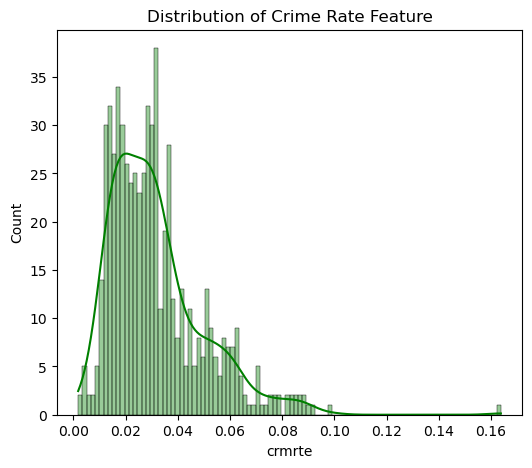

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

print('Statistics of Crime Rate: \n')
print(crimeData['crmrte'].describe())

plt.figure(figsize=(6, 5))
plt.title('Distribution of Crime Rate Feature')

# Use histplot instead of distplot
sns.histplot(crimeData['crmrte'], color='g', bins=100, kde=True, alpha=0.4)

## Distribution of All Features

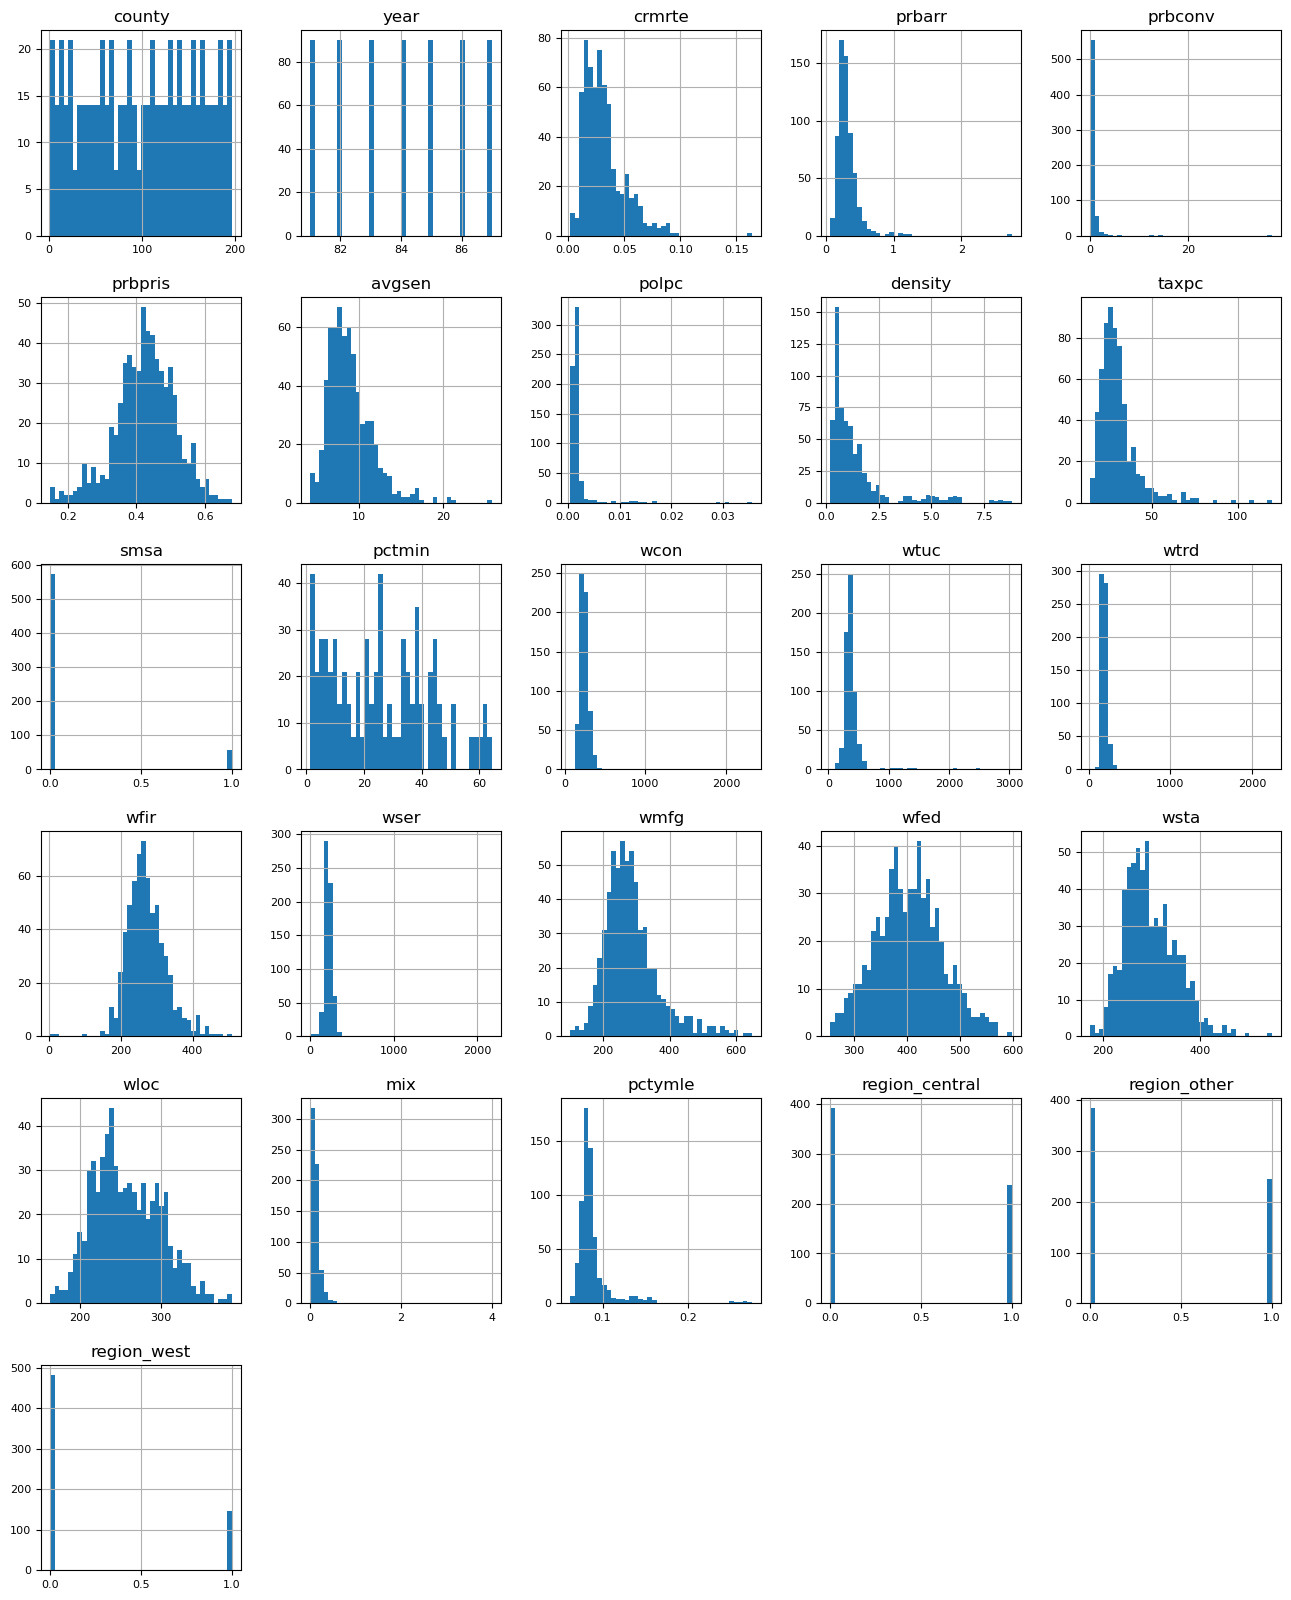

In [34]:
crimeData.hist(figsize=(16, 20), bins=40, xlabelsize=8, ylabelsize=8);

**Observation:**

The features **density, mix, police per capita, probability of conviction, and tax revenue per capita** appear to have similar distributions to the crime rate. However, no definitive conclusion can be drawn from this observation alone. Further examination using bivariate analysis is necessary to explore potential relationships.

## Probability/ Cumulative Distribution Function (CDF)

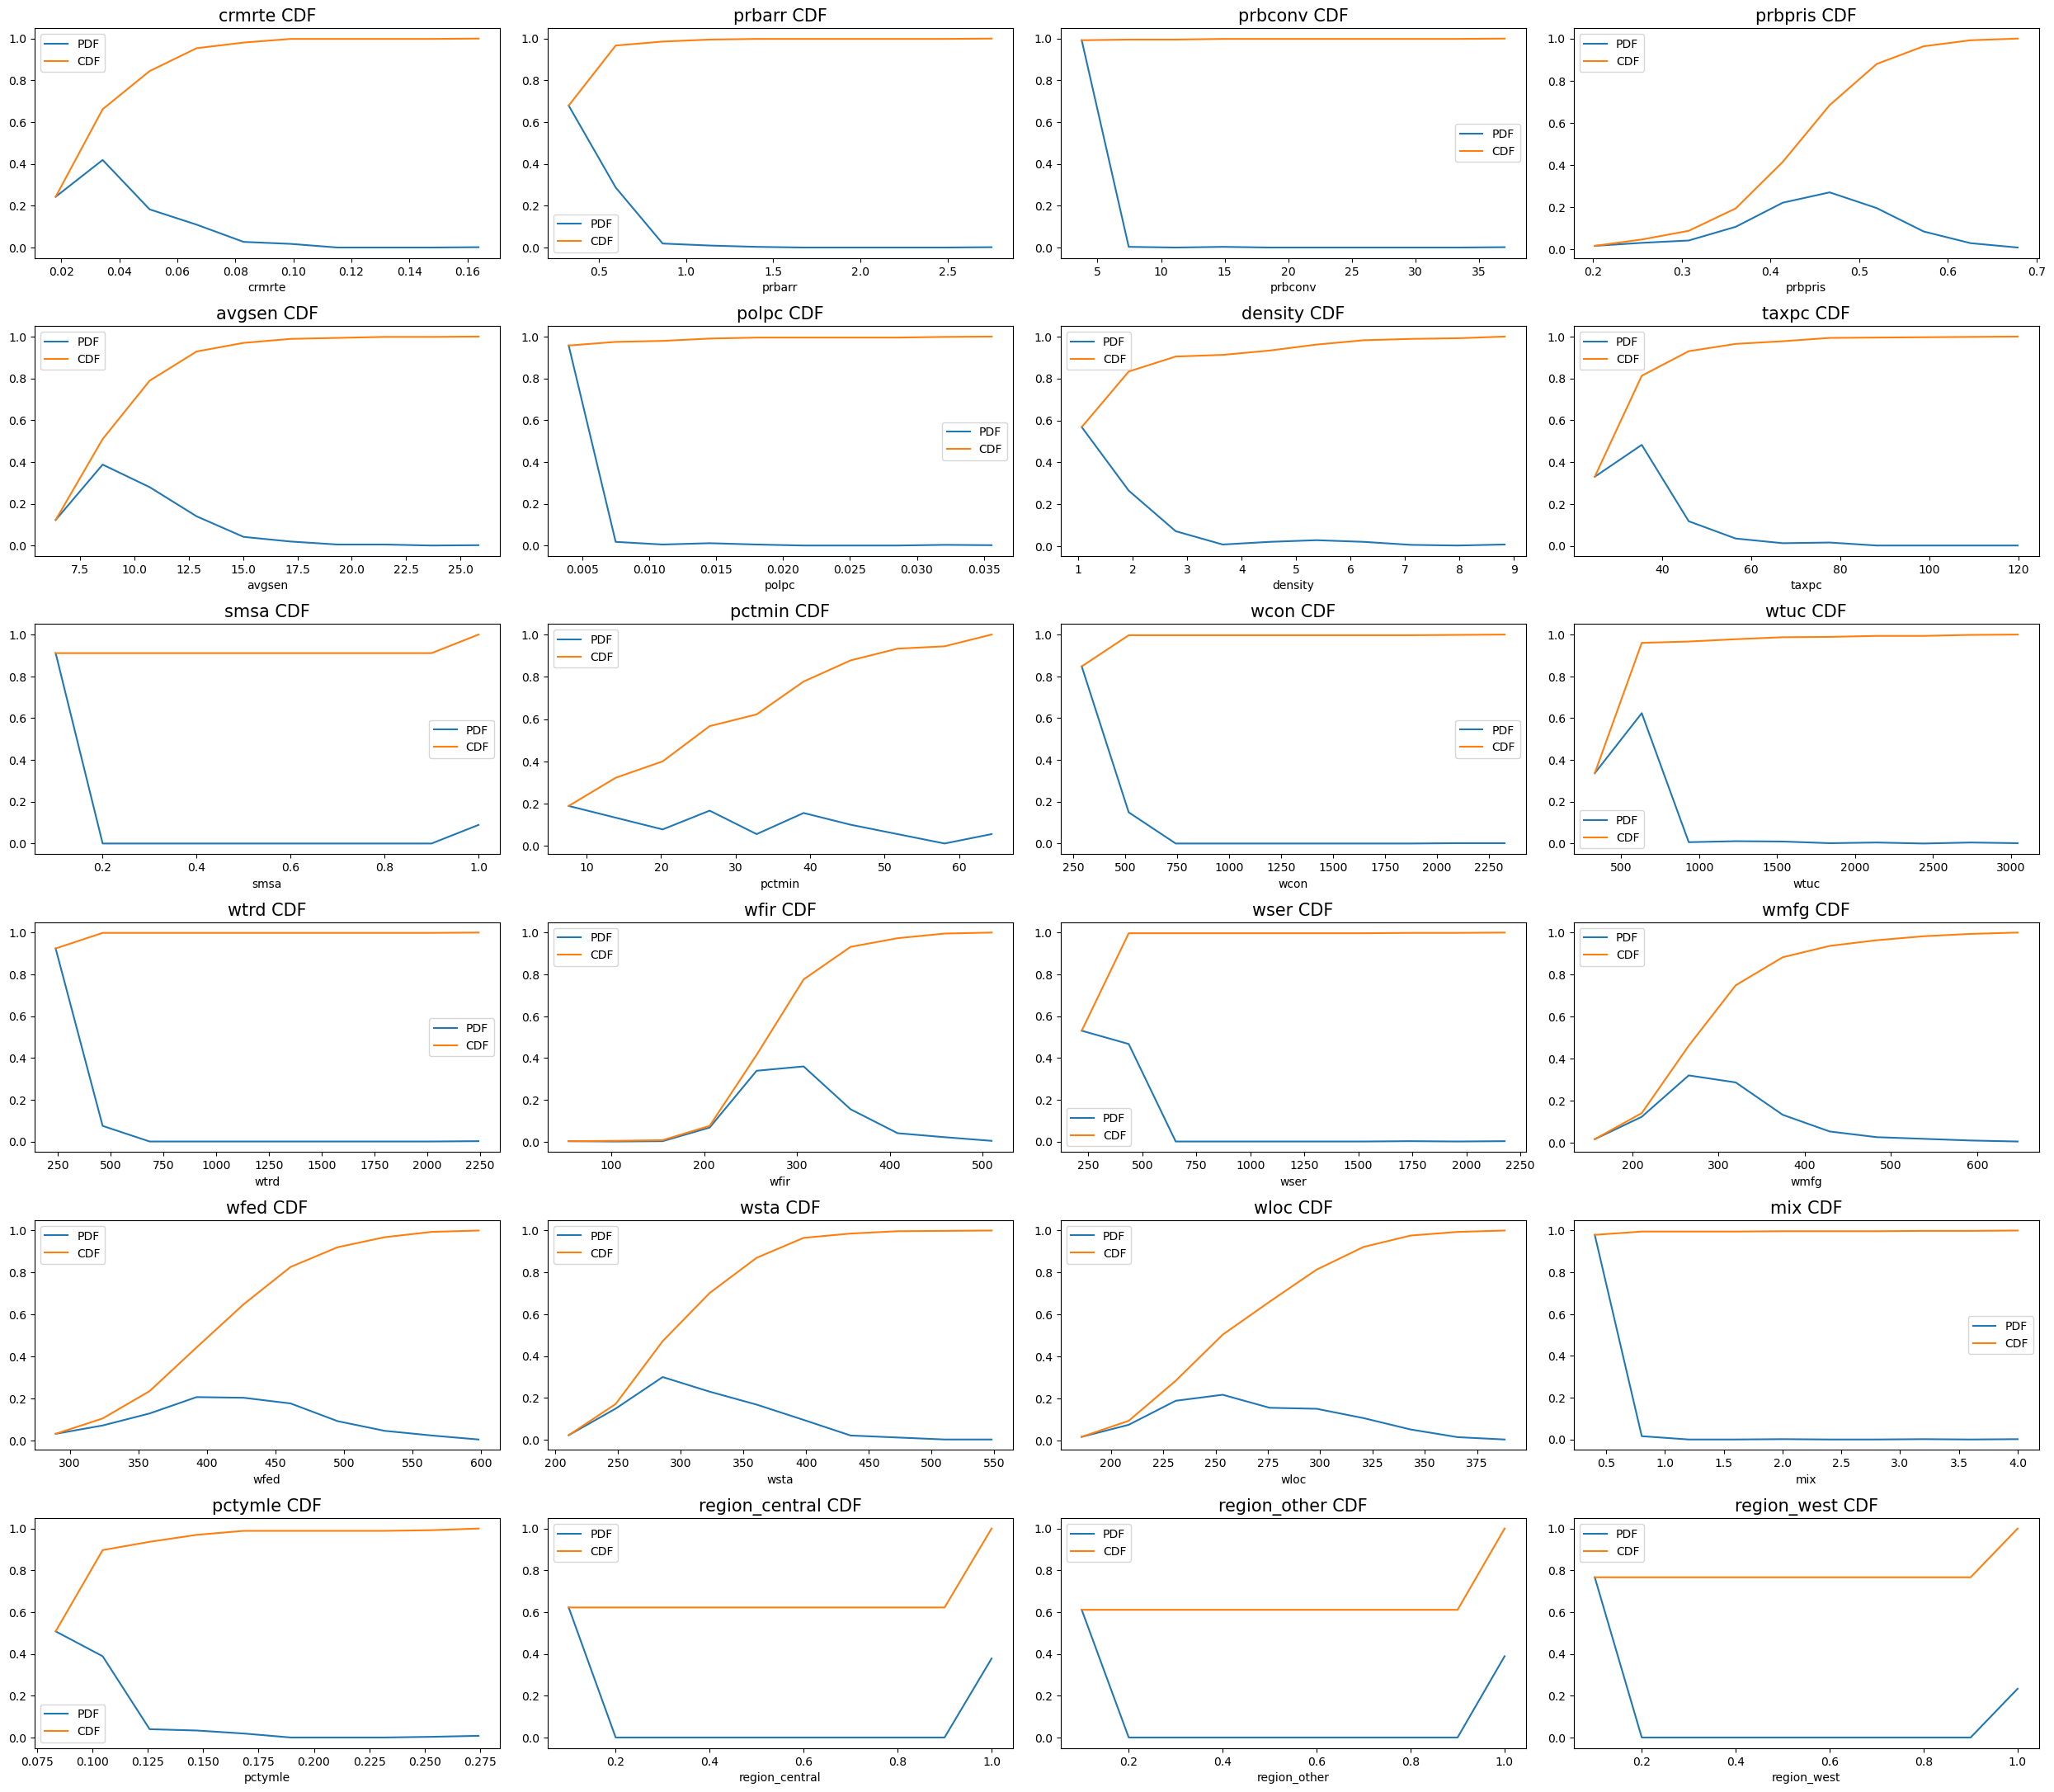

In [37]:
# You can get the percentage directly from CDF given one ‘x’ value.
# Such information is not available from PDF directly

plt.figure(figsize=(25,25))

for idx, col in enumerate(crimeData.columns[2:]): #excluding county & year
    # Convert the column to numeric, coercing errors to NaN
    numeric_data = pd.to_numeric(crimeData[col], errors='coerce')

    # Drop NaN values to avoid the error
    numeric_data = numeric_data.dropna()

    counts, bin_edges = np.histogram(numeric_data, bins=10, density = True)
    pdf = counts/(sum(counts))
    cdf = np.cumsum(pdf)

    plt.subplot(7, 4, idx+1)
    plt.plot(bin_edges[1:],pdf, label='PDF')
    plt.plot(bin_edges[1:],cdf, label='CDF')
    plt.title(col + " CDF",fontsize=15)
    plt.xlabel(col)
#     plt.ylabel('Probability')
    plt.tight_layout()

    plt.legend()

**Observations:**

a) One unusual observation is in the weekly wages of the service industry (wser). More than 95% of wages are below 400, but the maximum wage is around 2250. This anomaly is identified in **county 185.** Given the high percentage of minorities in this county (nearly 65%) and comparatively lower wages in other sectors, the service industry wages are likely erroneous. **We will remove "county 185" from the input data.**

b) Although the maximum value of tax revenue per capita is 120, more than 50% of the values are below 40.

c) Although the maximum value of police per capita is 0.009, more than 60% of the values are below 0.001.

# Bivariate Analysis

Bivariate visualization  is performed to find the relationship between each variable in the dataset and the target variable of interest, i.e. crime rate.

The plot of all features against crime rate is done as below.

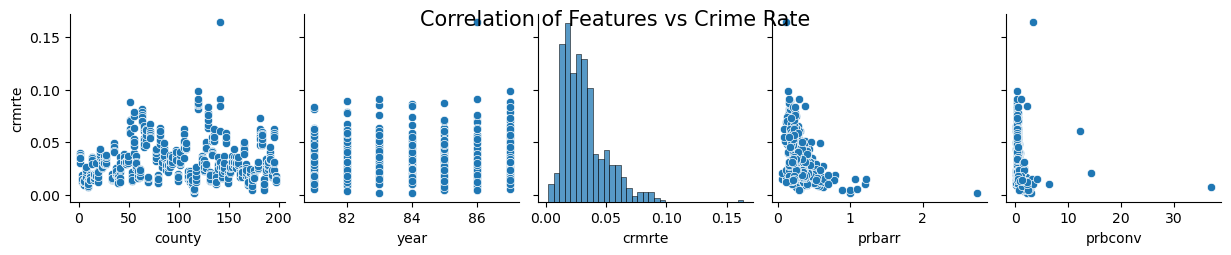

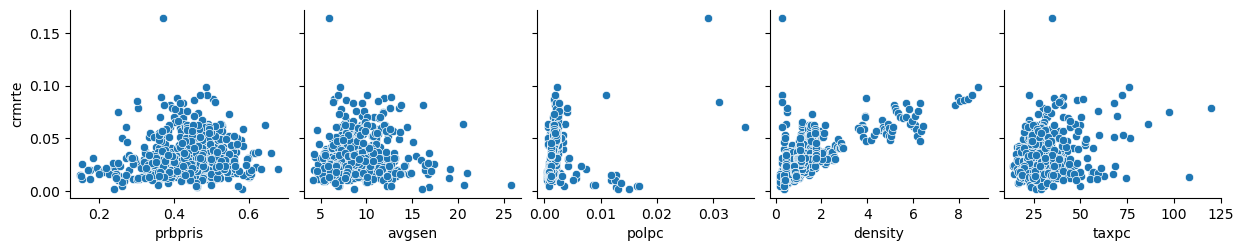

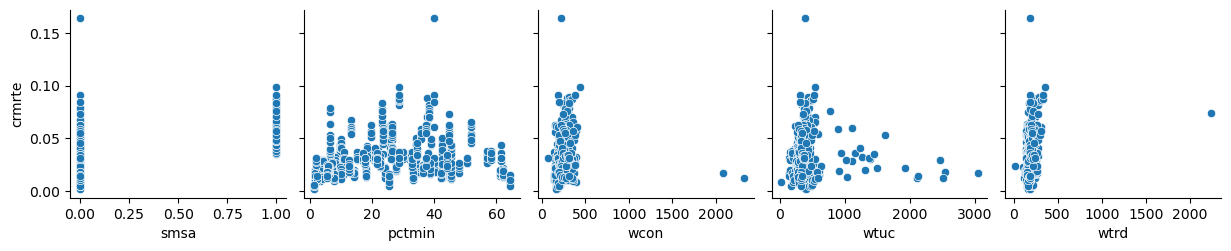

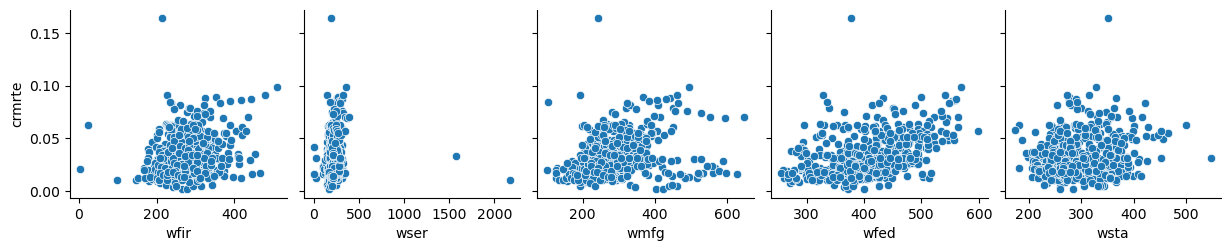

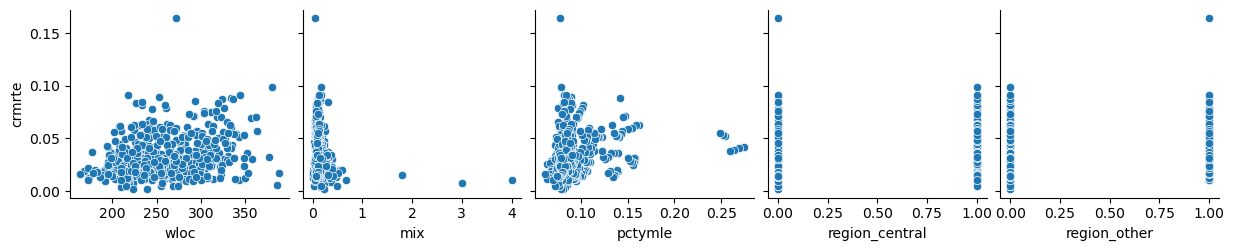

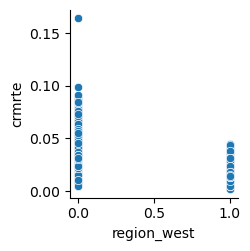

In [41]:
# To plot the correlation of all features against crime rate

for i in range(0, len(crimeData.columns), 5):
    sns.pairplot(data=crimeData,
                x_vars=crimeData.columns[i:i+5],
                y_vars=['crmrte'])
    if i == 0:
        plt.suptitle('Correlation of Features vs Crime Rate', fontsize = 15)

**Observations:**

a) Based on the above pairplot, it can be noted that **density is most positively correlated with crime rate. There is also some correlation with weekly wages under different domains but it needs further investigation, as they are not so pronounced.**

b) Strangely, the **weekly wage features and crime rate is found to be slightly positively correlated. This signifies unequal distribution of income** or probably high unemployment rate. One of the most important features that is not in the given data may be unemployment rate.

Lets try to find if there is any correlation among features for each location: 'west', 'central' & 'urban'.

Number of data points in category: region_west is 147
Number of data points in category: region_central is 238
Number of data points in category: region_other is 245


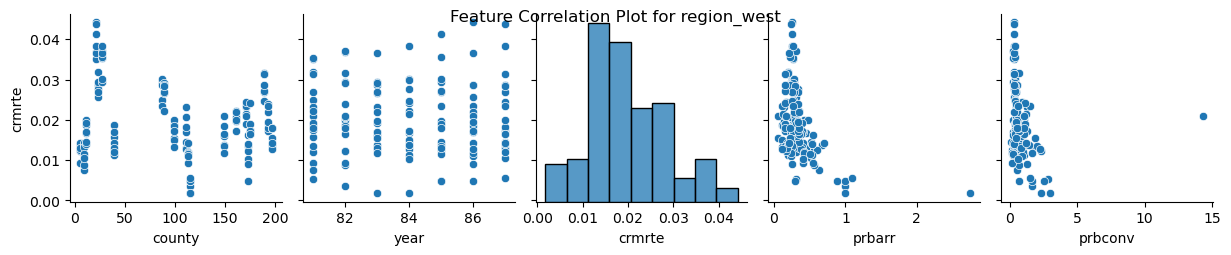

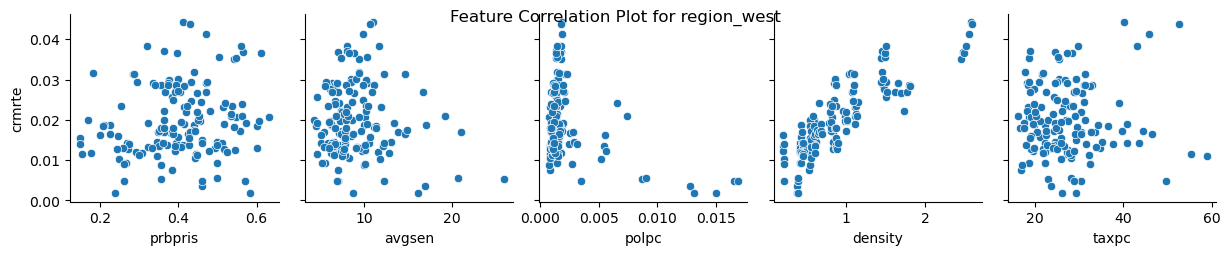

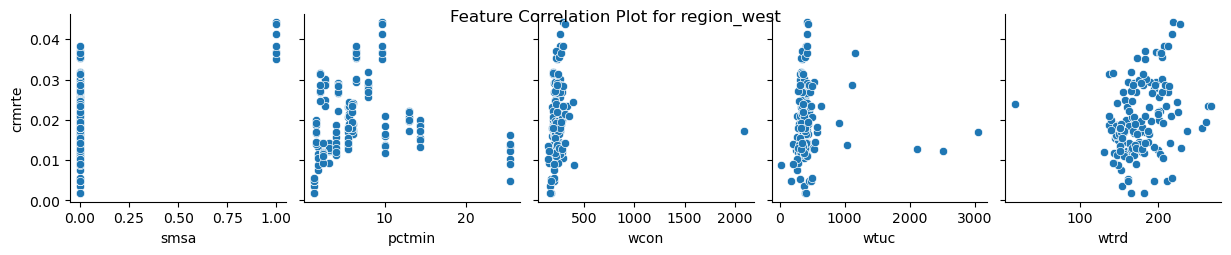

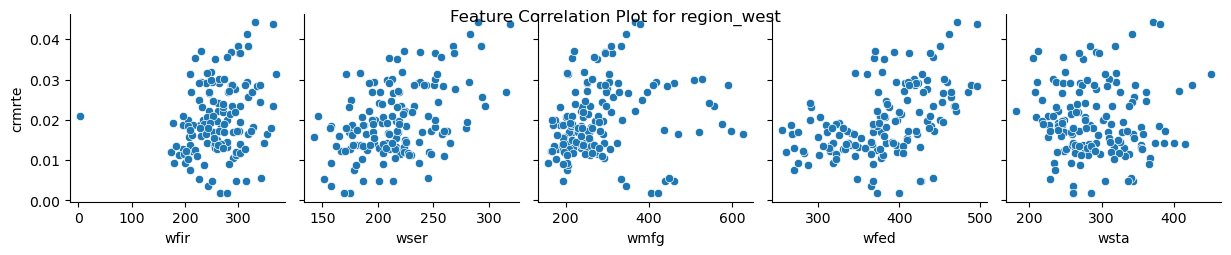

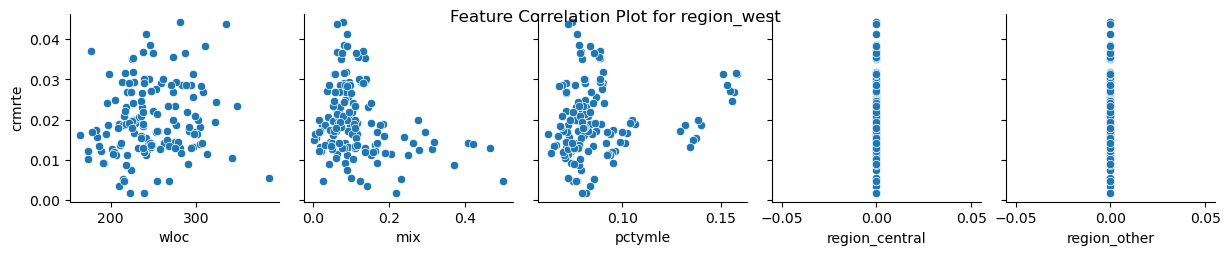

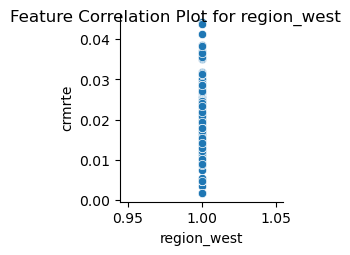

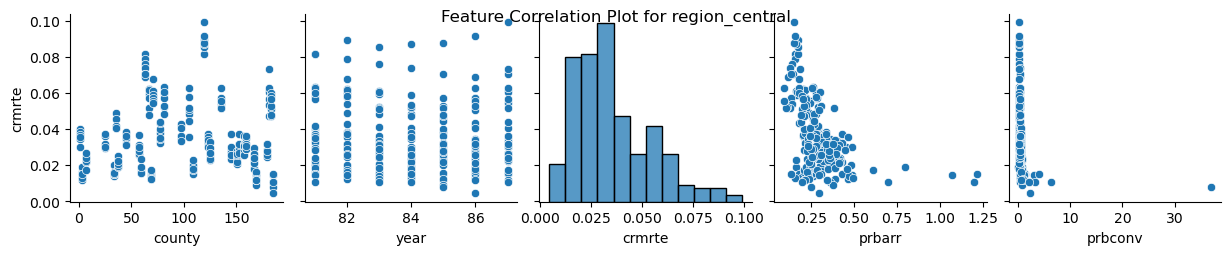

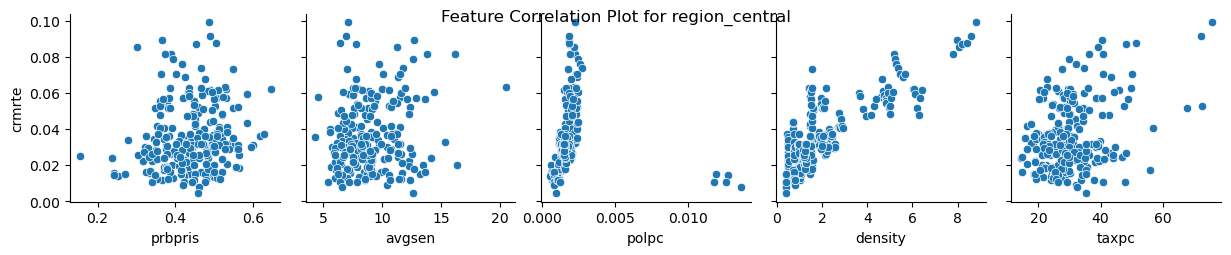

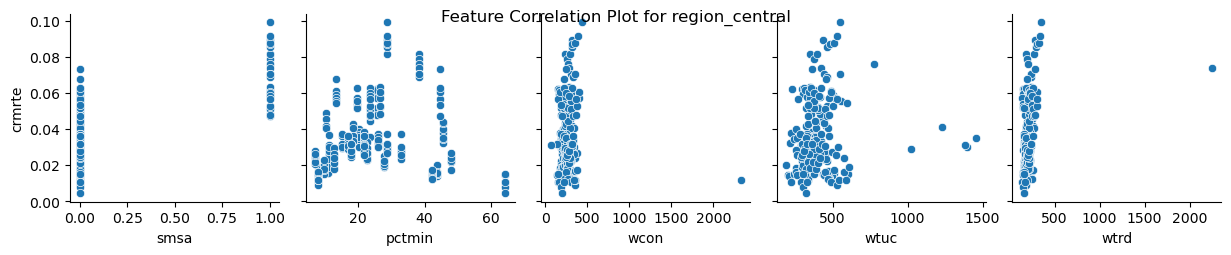

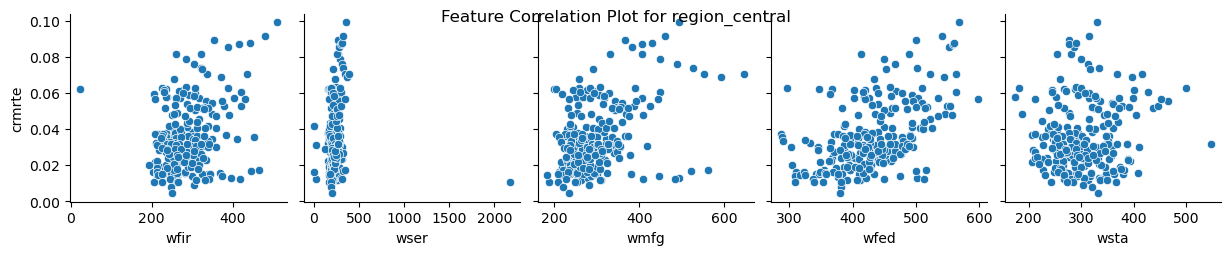

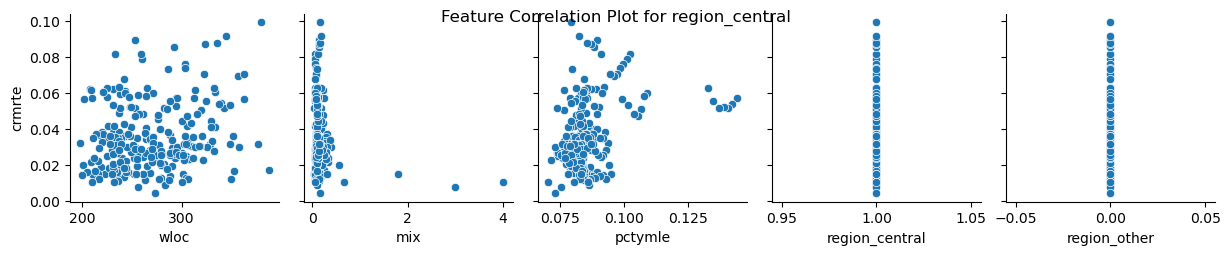

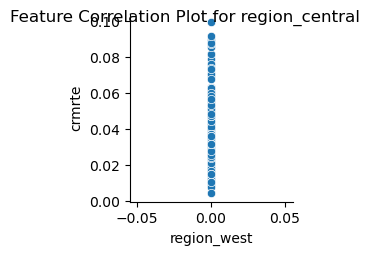

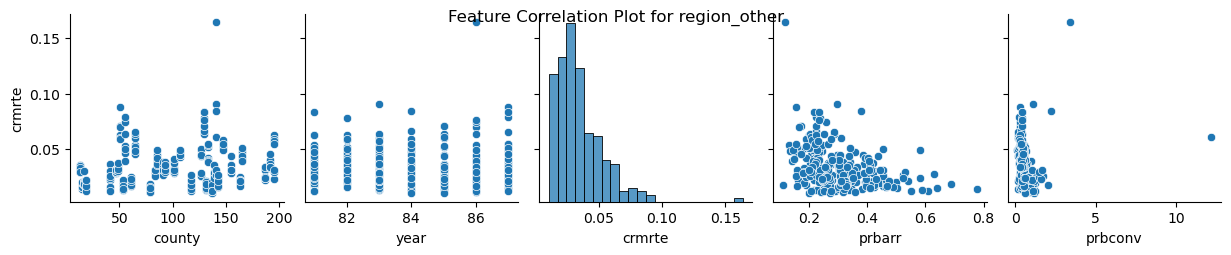

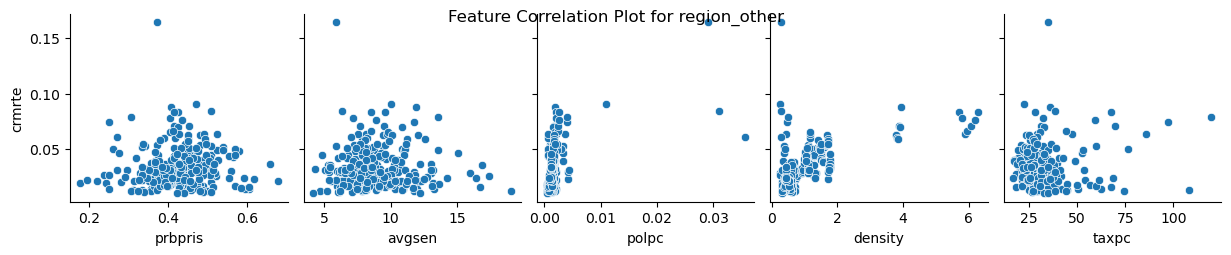

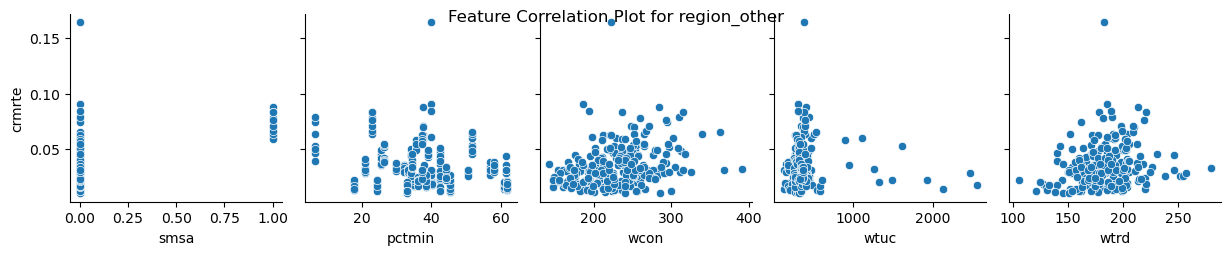

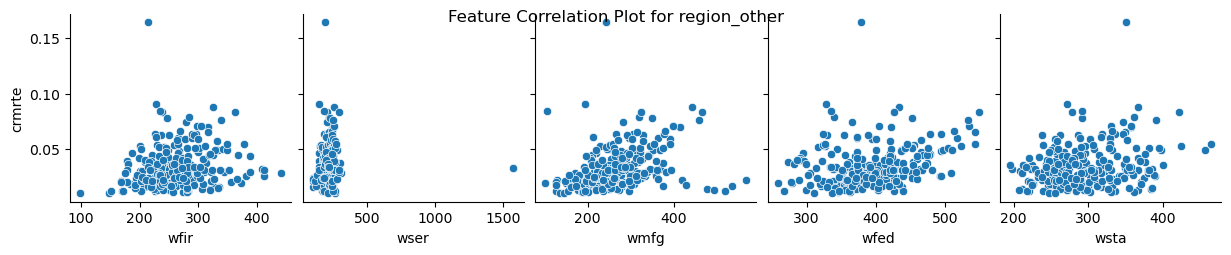

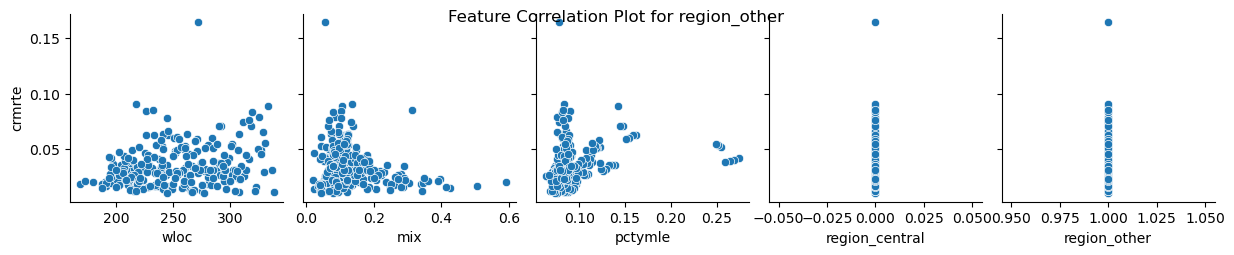

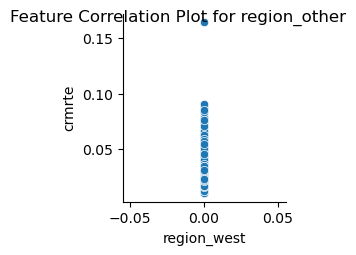

In [44]:
# To plot the correlation of boolean features against crime rate

# Categories: west, central and urban
categories = ['region_west', 'region_central', 'region_other']

for category in categories:

    categoricalCrime = crimeData[crimeData[category] == 1]
    print('Number of data points in category: ' +
                          category + ' is '+ str(len(categoricalCrime)))

    for i in range(0, len(categoricalCrime.columns), 5):

        sns.pairplot(data=categoricalCrime,
                    x_vars=categoricalCrime.columns[i:i+5],
                    y_vars=['crmrte'])
#          plt.title('Feature Correlation Plot for ' + category, loc = 'left')
        plt.suptitle('Feature Correlation Plot for ' + category)


**Observations:**

1) Some of the correlation lines are showing upward or downward trends more than before.

2) **Probability of conviction is found to have negative correlation with crime rate in both west and central, but not in urban areas.**

3) **Tax Per capita is found to have positive correlation with crime rate in both central and urban areas.**

4) **Percentage of minority is positively correlated with crime rate, both in west and in urban areas.**

5) Thus, a combination of density and location (urban/ west/ central) might help aid crime rate prediction.

6) However, there seems to be **not much data for 'urban areas'** to arrive at a conclusion.

## Linear Regression Fit of Strongly Correlated Features

We have a lot of features to analyse in the input dataset. So let's take the strongly correlated quantitative features from this dataset and analyse them one by one.

In [46]:
# To find out strongly correlated values with crime rate.
# 40% is taken as the threshold beyond which we include the feature in model.

crimeData_corr = crimeData.corr()['crmrte']
selected_features_list = crimeData_corr[
                abs(crimeData_corr) > 0.4].sort_values(ascending=False)
print("There are {} strongly correlated values with Crime Rate:\n{}".format(
                len(selected_features_list), selected_features_list))

print(list(selected_features_list.index))

There are 4 strongly correlated values with Crime Rate:
crmrte     1.000000
density    0.694072
smsa       0.559530
wfed       0.437157
Name: crmrte, dtype: float64
['crmrte', 'density', 'smsa', 'wfed']


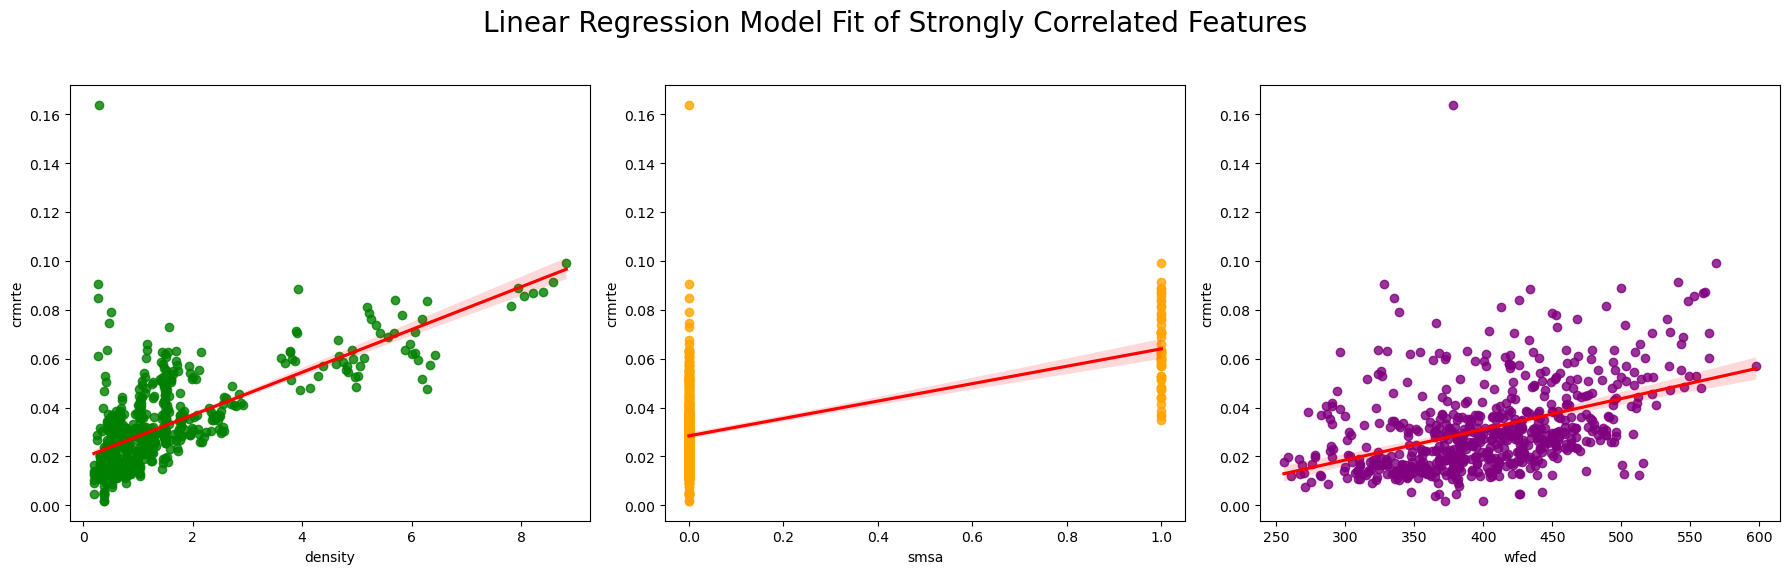

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the features to check
features = ['density', 'smsa', 'wfed']

# Plot data and a linear regression model fit
fig, ax = plt.subplots(1, 3, figsize=(18, 6))  # Adjusted to 1 row and 3 columns

plt.suptitle('Linear Regression Model Fit of Strongly Correlated Features', fontsize=20)

colors = ['green', 'orange', 'purple']  # Different colors for each feature

for i, ax in enumerate(fig.axes):
    if i < len(features):
        sns.regplot(x=features[i], y='crmrte',
                    data=crimeData, ax=ax,  # Use the entire dataset
                    scatter_kws={'color': colors[i]},  # Use specified colors
                    line_kws={'color': 'red'})  # Red line for consistency

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit title
plt.show()



## Box Plots

Let's do the box plot & violin plot for the boolean features 'west', 'central', 'urban' to find impact on crime rate, if any.

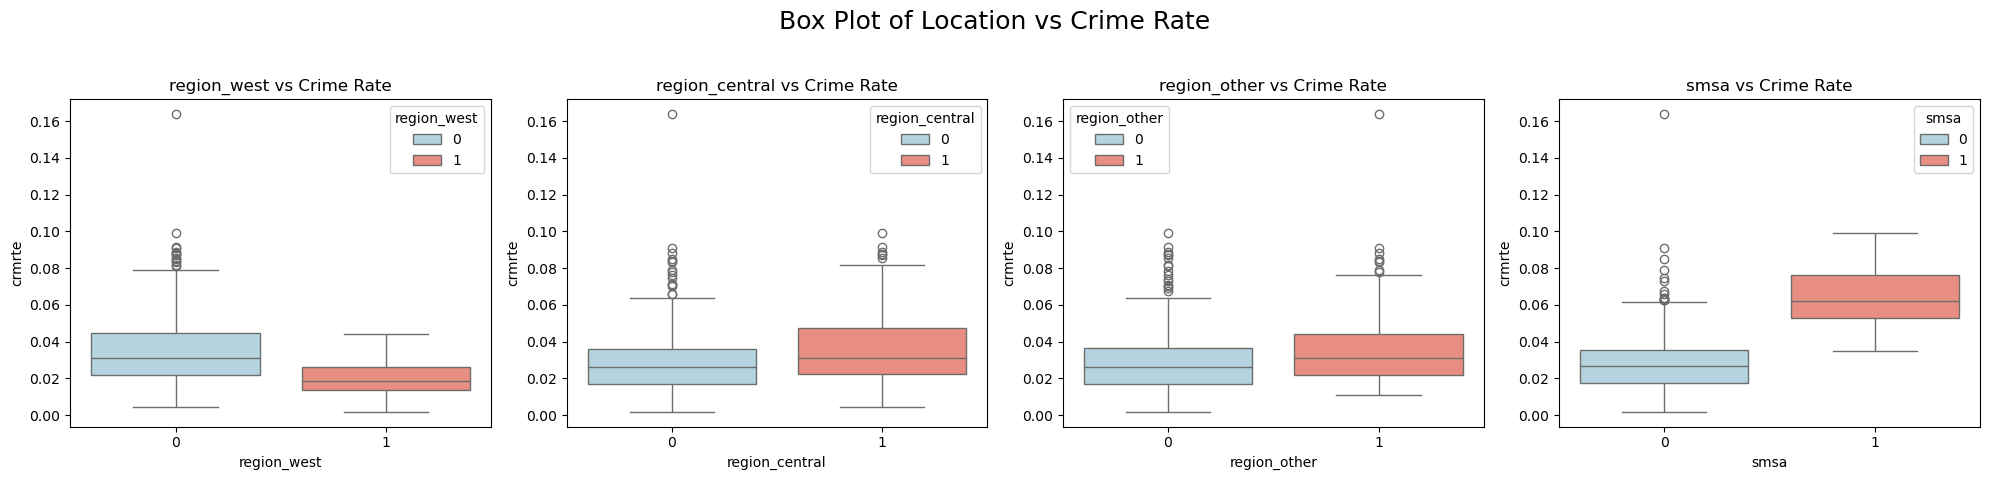

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Categories: west, central, other, and urban
categories = ['region_west', 'region_central', 'region_other', 'smsa']

fig, axes = plt.subplots(1, 4, figsize=(20, 5))  # Adjusted to 4 subplots
plt.suptitle('Box Plot of Location vs Crime Rate', fontsize=18)

# Define a dictionary to map integer values to colors
color_mapping = {0: 'lightblue', 1: 'salmon'}

for idx, cat in enumerate(categories):
    # Use 'hue' parameter to apply the color mapping
    sns.boxplot(x=cat, y='crmrte', data=crimeData, ax=axes[idx],
                hue=cat, palette=color_mapping, dodge=False) \
                .set_title(cat + ' vs Crime Rate')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit title
plt.show()

## Violin Plots

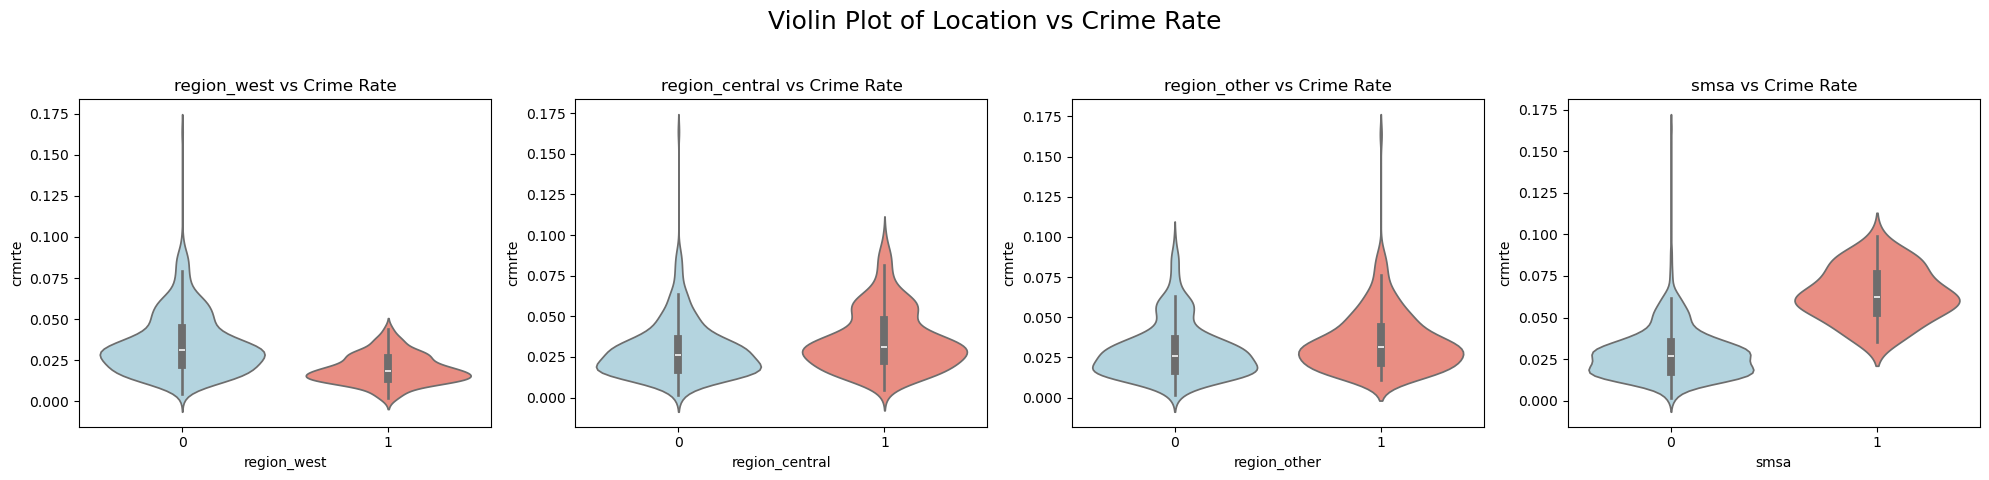

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Categories: west, central, other, smsa
categories = ['region_west', 'region_central', 'region_other', 'smsa']

fig, axes = plt.subplots(1, 4, figsize=(20, 5))  # Adjusted to 4 subplots
plt.suptitle('Violin Plot of Location vs Crime Rate', fontsize=18)

# Define a dictionary to map integer values to colors
color_mapping = {0: 'lightblue', 1: 'salmon'}

for idx, cat in enumerate(categories):
    # Create a violin plot for each category with hue set to the category
    sns.violinplot(x=cat, y='crmrte', data=crimeData, hue=cat, palette=color_mapping, ax=axes[idx], legend=False) \
        .set_title(cat + ' vs Crime Rate')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit title
plt.show()


**Observations:**

a) The crime rate in urban areas (represented by the `smsa` plot) is significantly high. This indicates that the feature 'urban' is a useful variable for prediction.

b) The crime rate in the west is found to be lower, and in the central region, it is moderate. However, due to significant overlap in the distributions, these variations may not be very helpful for prediction.

# Features Correlation Analysis

Many times, more than one input could be dependent on each other. In Linear Regression, the requirement is that all the input variables are independent of each other.

When a feature is dependent on one or more of the other input features, it leads to a phenomenon known as multi-collinearity. **Multi-collinearity among features can be identified by doing Feature-Feature correlation analysis.**

<Axes: title={'center': 'Correlation of All-against-All Features'}>

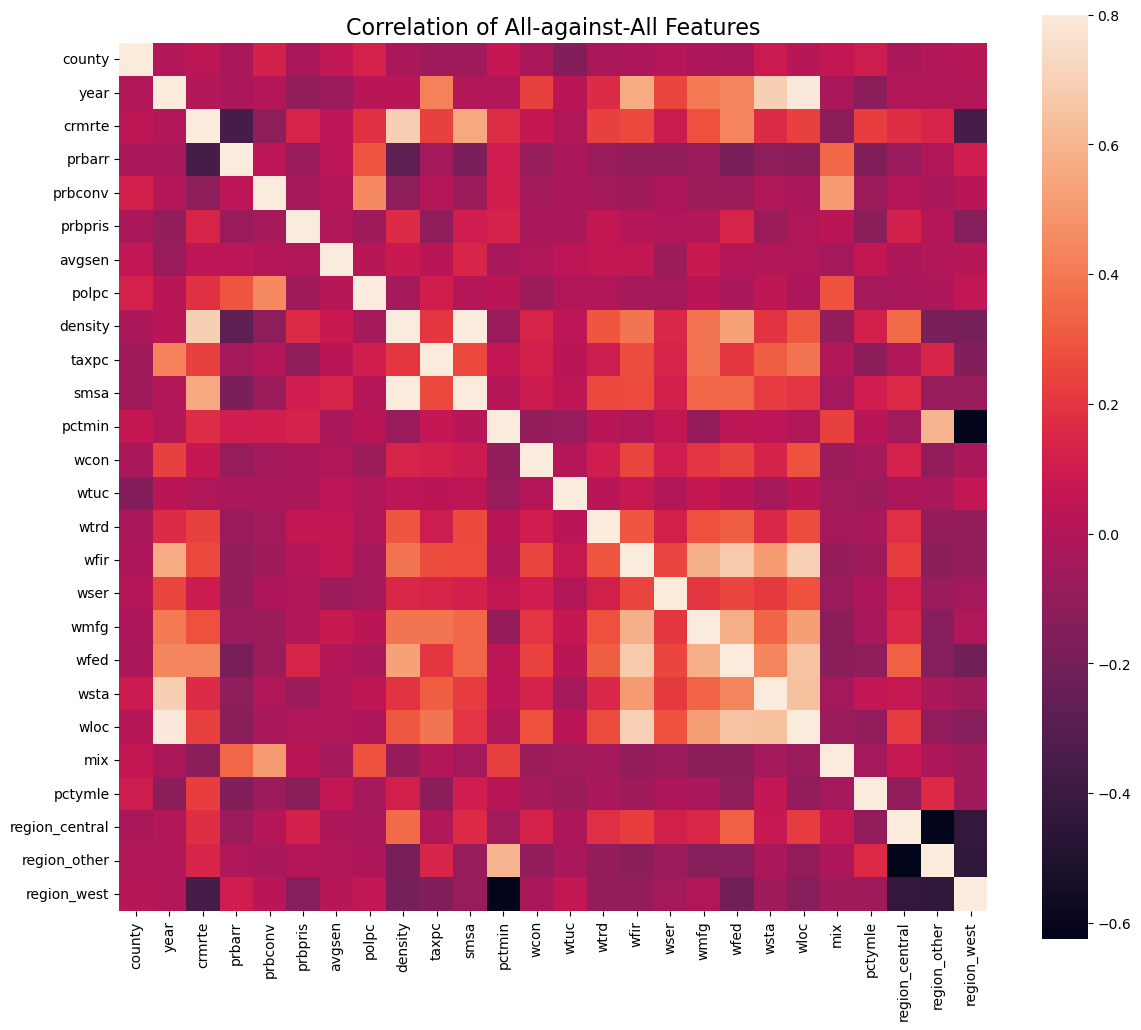

In [67]:
# Drawing a heatmap
crimeData_corr = crimeData.corr()

f , ax = plt.subplots(figsize = (14,12))
plt.title('Correlation of All-against-All Features',y=1,size=16)
sns.heatmap(crimeData_corr,square = True,  vmax=0.8)


**Observations from the Feature Heatmap:**

a) The **density and urban variables appear to be highly correlated**, which is expected since urban areas are typically densely populated.

b) **Several "wage features" show positive correlations**. As wages increase or decrease in one domain, they tend to influence others. For instance, **`wtrd` and `wfir` are positively correlated with `wfed` and `wloc`. Additionally, `wfir` and `wtrd` exhibit moderate correlation**.

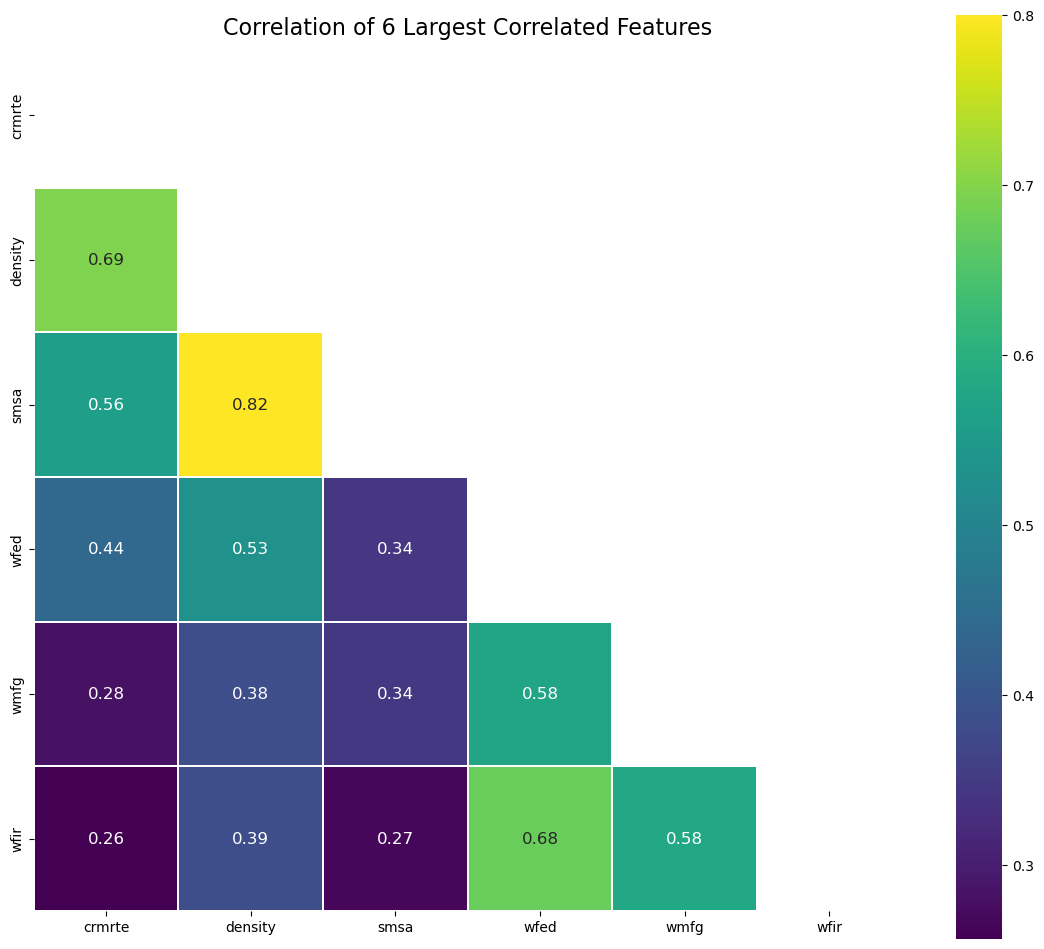

In [70]:
# Number of top correlated features to display
k = 6

# Get the top k features correlated with 'crmrte'
cols = crimeData_corr.nlargest(k, 'crmrte')['crmrte'].index

# Calculate the correlation matrix for the selected columns
cm = np.corrcoef(crimeData[cols].values.T)

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(cm, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 12))

# Draw the heatmap with the mask and correct aspect ratio
plt.title('Correlation of ' + str(k) + ' Largest Correlated Features', y=1, size=16)
sns.heatmap(cm, mask=mask, vmax=.8, linewidths=0.01, square=True, annot=True, cmap='viridis',
            linecolor="white", xticklabels=cols.values, yticklabels=cols.values,
            annot_kws={'size': 12})

plt.show()

**Observations from Zoomed Feature HeatMap:**

1. There is a strong positive correlation (0.69) between density and crime rate, suggesting that areas with higher density tend to have higher crime rates.

2. The correlation between `smsa` (urban areas) and crime rate is 0.56, indicating a moderate positive relationship.

3. A very high correlation (0.82) exists between density and urban areas, which is expected since urban areas are typically denser.

## **Objective:**

To use insights from EDA to develop a suitable **linear model with crmrte as the dependent variable** and explain the various aspects of the model.

## Actionable Observations from EDA

1) The **density and urban variable** has highest correlation with crime rate.

2) But, density and urban variable **seems to be highly correlated**, which is obvious, because urban areas are densely populated. Hence, there is a **high chance of multicollinearity** between density and urban features. We wll use linear regression to sort out this question.

3) The feature, 'urban' has a correlation of 0.62 with crime rate, but whether the correlation is because 'urban' has very high correlation with 'density' is yet to be known.

4) A combination of density and location (west/ central/ urban) can help aid crime rate prediction.

5) Wage columns, wfed & wtrd are positively correlated to 'density' feature. This can be intuitively understood as the **weekly wages would be higher in urban areas.**

6) Some of the **"wage features" are positively correlated**, as the wage increase/ decrease in one domain would certainly influence the other.

7) wtrd & wfir are positively correlated to wfed & wloc. Also, wfir and wtrd have moderate correlation with each other.

8) There are **3 strongly correlated values** with Crime Rate: 'density', 'smsa' and 'wfed'



In [77]:
# Data Cleaning based on EDA
# Last row with special character fixed in input data.

# Removing the wage outlier row based on observation from EDA
crimeData = crimeData[crimeData.county != 185] # very high wser & prob of conviction
crimeData = crimeData[crimeData.county != 115] # prob of arrest > 1

# Removing rows with probability of arrest and conviction > 1
crimeData = crimeData[crimeData['prbarr'] < 1]
crimeData = crimeData[crimeData['prbconv'] < 1]

# The location cannot be both west and central together.
crimeData = crimeData[crimeData['region_west']+crimeData['region_central'] <= 1]

# dropping the Year column as it doesnt help in prediction
crimeData = crimeData.drop('year', axis=1)

# (Q) how many after deletion?
print (crimeData.shape)

(555, 25)


# Evaluate Observations using Linear Regression Model

Lets evaluate the above observations by building Linear Regression Models, as it helps to understand the relation between variables better.

## Creating Model with Most Correlated Feature

In [142]:
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics

y = crimeData['crmrte']
# X = crimeData.drop('crmrte', axis=1)
X = crimeData['density']

# without a constant we are forcing our model to go through the origin
X = sm.add_constant(X) # To add an intercept to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit()
# predictions = model.predict(X) # make the predictions by the model

density_pvalue = model.pvalues['density']

# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 crmrte   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     748.1
Date:                Sat, 02 Nov 2024   Prob (F-statistic):          8.14e-105
Time:                        19:18:40   Log-Likelihood:                 1713.1
No. Observations:                 555   AIC:                            -3422.
Df Residuals:                     553   BIC:                            -3413.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0204      0.001     30.841      0.000       0.019       0.022
density        0.0086      0.000     27.351      0.000       0.008       0.009
==============================================================================
Omnibus:                      110.369   Durbin-Watson:                   0.467
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.278
Skew:                           1.134   Prob(JB):                     9.77e-46
Kurtosis:                       4.954   Cond. No.                         3.34
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Interim Observations:**

a) As the p-value of the `density` coefficient is 0 (very small), it indicates a statistically significant relationship between changes in crime rate and changes in population density.

b) The R-squared value is found to be 0.575 with only `density` as the predictor variable. This means that 57.5% of the variability in crime rate is explained by the `density` feature.

c) The coefficient estimate of 0.0086 for `density` indicates that a one-unit increase in density would lead to an increase of 0.0086 units in the crime rate, holding all other factors constant.

## Creating Model with Top 2 Correlated Features

In [145]:
y = crimeData['crmrte']
# X = crimeData.drop('crmrte', axis=1)
# X = crimeData[('density', 'smsa')]
X = crimeData[['density', 'smsa']]

# without a constant we are forcing our model to go through the origin
X = sm.add_constant(X) # To add an intercept to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit()

density_pvalue_upd = model.pvalues['density']
print('Difference in P-Value = ' + str(density_pvalue_upd - density_pvalue))

# Print out the statistics
model.summary()


Difference in P-Value = 1.2425312504534279e-48


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 crmrte   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     373.8
Date:                Sat, 02 Nov 2024   Prob (F-statistic):          2.28e-103
Time:                        19:20:53   Log-Likelihood:                 1713.3
No. Observations:                 555   AIC:                            -3421.
Df Residuals:                     552   BIC:                            -3408.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0201      0.001     26.231      0.000       0.019       0.022
density        0.0089      0.001     16.212      0.000       0.008       0.010
smsa          -0.0017      0.003     -0.636      0.525      -0.007       0.004
==============================================================================
Omnibus:                      110.508   Durbin-Watson:                   0.466
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.945
Skew:                           1.134   Prob(JB):                     7.00e-46
Kurtosis:                       4.961   Cond. No.                         13.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Interim Observations:**

a) **R-squared value remains the same (0.575)** when the variable 'smsa' is coupled with 'density' as predictor variables. Although R-squared tends to increase with the addition of more variables, it has not changed in this case, suggesting that 'smsa' may not contribute significantly to explaining the variability in the crime rate.

b) The Adjusted R-squared remains at 0.574, indicating that the addition of 'smsa' does not penalize the model for adding a non-contributory variable. The AIC value is -3422, which is a measure of model quality; since we don't have a previous AIC for comparison, this serves as a baseline.

c) It has been noticed that the **p-value of the 'density' feature remains unchanged**, indicating that the inclusion of 'smsa' does not affect the significance of 'density' in predicting crime rate.

Thus, **the model's reliability in explaining the crime rate is not significantly affected by the inclusion of 'smsa'**, suggesting that 'smsa' does not contribute meaningfully to the prediction. This observation aligns with the exploratory data analysis, which may have indicated a weak correlation between 'smsa' and 'd

# Multiple Linear Regression

## Model with all Features

In [151]:
y = crimeData['crmrte']
X = crimeData.drop('crmrte', axis=1)

# without a constant we are forcing our model to go through the origin
X = sm.add_constant(X) # To add an intercept to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit()

# Print out the statistics
model.summary()
# density_pvalue = model.pvalues

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 crmrte   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     112.1
Date:                Sat, 02 Nov 2024   Prob (F-statistic):          7.14e-187
Time:                        19:25:07   Log-Likelihood:                 1966.0
No. Observations:                 555   AIC:                            -3884.
Df Residuals:                     531   BIC:                            -3780.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0244      0.004      6.547      0.000       0.017       0.032
county          8.482e-06   5.63e-06      1.507      0.132   -2.57e-06    1.95e-05
prbarr            -0.0492      0.004    -13.112      0.000      -0.057      -0.042
prbconv           -0.0271      0.002    -12.074      0.000      -0.031      -0.023
prbpris           -0.0043      0.004     -1.057      0.291      -0.012       0.004
avgsen         -9.382e-05      0.000     -0.727      0.468      -0.000       0.000
polpc              4.7455      0.701      6.769      0.000       3.368       6.123
density            0.0055      0.000     11.510      0.000       0.005       0.006
taxpc              0.0001   3.78e-05      3.705      0.000    6.59e-05       0.000
smsa              -0.0021      0.002     -1.018      0.309      -0.006       0.002
pctmin             0.0002    3.2e-05      6.757      0.000       0.000       0.000
wcon            4.848e-07   2.52e-06      0.192      0.848   -4.47e-06    5.44e-06
wtuc           -3.632e-07   1.18e-06     -0.308      0.758   -2.68e-06    1.95e-06
wtrd             1.29e-06   3.54e-06      0.365      0.716   -5.66e-06    8.24e-06
wfir            6.224e-07   9.84e-06      0.063      0.950   -1.87e-05    1.99e-05
wser           -3.978e-06   4.66e-06     -0.854      0.394   -1.31e-05    5.18e-06
wmfg            1.743e-06   5.57e-06      0.313      0.754    -9.2e-06    1.27e-05
wfed            2.051e-05   8.67e-06      2.367      0.018    3.49e-06    3.75e-05
wsta           -3.871e-05   8.05e-06     -4.807      0.000   -5.45e-05   -2.29e-05
wloc            1.768e-05    1.4e-05      1.259      0.208    -9.9e-06    4.53e-05
mix               -0.0039      0.005     -0.811      0.418      -0.013       0.006
pctymle            0.0384      0.014      2.670      0.008       0.010       0.067
region_central     0.0077      0.001      5.415      0.000       0.005       0.010
region_other       0.0113      0.001      7.974      0.000       0.009       0.014
region_west        0.0054      0.001      3.921      0.000       0.003       0.008
==============================================================================
Omnibus:                       30.395   Durbin-Watson:                   0.826
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.757
Skew:                           0.489   Prob(JB):                     3.84e-09
Kurtosis:                       3.849   Cond. No.                     4.71e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.09e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [155]:
y = crimeData['crmrte']

# Feature 'smsa' is found to be worsen the model as per above analysis.
# Intuitively county shouldnt contribute prediction and also p value is high.
X = crimeData.drop(['crmrte', 'smsa', 'county'], axis=1)

# without a constant we are forcing our model to go through the origin
X = sm.add_constant(X) # To add an intercept to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 crmrte   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     122.2
Date:                Sat, 02 Nov 2024   Prob (F-statistic):          3.62e-188
Time:                        19:25:30   Log-Likelihood:                 1964.1
No. Observations:                 555   AIC:                            -3884.
Df Residuals:                     533   BIC:                            -3789.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0255      0.004      6.901      0.000       0.018       0.033
prbarr            -0.0493      0.004    -13.125      0.000      -0.057      -0.042
prbconv           -0.0274      0.002    -12.226      0.000      -0.032      -0.023
prbpris           -0.0044      0.004     -1.081      0.280      -0.012       0.004
avgsen            -0.0001      0.000     -0.833      0.405      -0.000       0.000
polpc              4.7702      0.702      6.795      0.000       3.391       6.149
density            0.0051      0.000     17.033      0.000       0.004       0.006
taxpc              0.0001   3.76e-05      3.513      0.000    5.82e-05       0.000
pctmin             0.0002    3.1e-05      6.855      0.000       0.000       0.000
wcon            3.706e-07   2.52e-06      0.147      0.883   -4.58e-06    5.33e-06
wtuc           -6.877e-07   1.17e-06     -0.590      0.556   -2.98e-06     1.6e-06
wtrd            9.196e-07   3.53e-06      0.260      0.795   -6.02e-06    7.86e-06
wfir             1.04e-06   9.83e-06      0.106      0.916   -1.83e-05    2.04e-05
wser            -4.52e-06   4.65e-06     -0.971      0.332   -1.37e-05    4.62e-06
wmfg            1.349e-06   5.52e-06      0.244      0.807   -9.49e-06    1.22e-05
wfed            2.122e-05   8.56e-06      2.479      0.013    4.41e-06     3.8e-05
wsta           -3.939e-05   7.87e-06     -5.009      0.000   -5.48e-05   -2.39e-05
wloc            1.998e-05    1.4e-05      1.430      0.153   -7.46e-06    4.74e-05
mix               -0.0050      0.005     -1.044      0.297      -0.014       0.004
pctymle            0.0405      0.014      2.818      0.005       0.012       0.069
region_central     0.0082      0.001      5.875      0.000       0.005       0.011
region_other       0.0118      0.001      8.360      0.000       0.009       0.015
region_west        0.0055      0.001      4.065      0.000       0.003       0.008
==============================================================================
Omnibus:                       31.130   Durbin-Watson:                   0.828
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.303
Skew:                           0.491   Prob(JB):                     1.77e-09
Kurtosis:                       3.881   Cond. No.                     1.55e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.91e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Interim Observations:**

a) **Adj. R-squared improved** from 0.821 in the all-feature model to 0.828, after removal of the features 'smsa' and 'county'.

b) **AIC value decreased** from -3789 in the all-feature model to -3884, after removal of the features 'smsa' and 'county'.

Thus, **we have a better model than the all-feature model.** We will try to remove more features and analyze the model indicators.

In [91]:
y = crimeData['crmrte']
# Features are dropped based on p-value, R-Squared and AIC figures.
X = crimeData.drop(['crmrte', 'region_other', 'county',
                    'wmfg', 'prbpris', 'wloc', 'region_west', 'wtuc'], axis=1)

# without a constant we are forcing our model to go through the origin
X = sm.add_constant(X) # To add an intercept to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 crmrte   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     145.3
Date:                Sat, 02 Nov 2024   Prob (F-statistic):          4.17e-188
Time:                        18:32:30   Log-Likelihood:                 1953.6
No. Observations:                 555   AIC:                            -3871.
Df Residuals:                     537   BIC:                            -3794.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0302      0.004      7.260      0.000       0.022       0.038
prbarr            -0.0513      0.004    -13.758      0.000      -0.059      -0.044
prbconv           -0.0275      0.002    -12.331      0.000      -0.032      -0.023
avgsen         -8.517e-05      0.000     -0.651      0.515      -0.000       0.000
polpc              4.3048      0.687      6.262      0.000       2.954       5.655
density            0.0058      0.000     12.368      0.000       0.005       0.007
taxpc              0.0002   3.46e-05      5.805      0.000       0.000       0.000
smsa              -0.0046      0.002     -2.345      0.019      -0.008      -0.001
pctmin             0.0003   2.12e-05     15.019      0.000       0.000       0.000
wcon            1.198e-06   2.54e-06      0.471      0.638    -3.8e-06     6.2e-06
wtrd            1.289e-06   3.57e-06      0.361      0.718   -5.73e-06    8.31e-06
wfir             2.24e-06   8.97e-06      0.250      0.803   -1.54e-05    1.99e-05
wser           -5.218e-06   4.69e-06     -1.114      0.266   -1.44e-05    3.99e-06
wfed            2.259e-05   8.33e-06      2.714      0.007    6.24e-06    3.89e-05
wsta           -3.257e-05   7.33e-06     -4.446      0.000    -4.7e-05   -1.82e-05
mix               -0.0068      0.005     -1.412      0.158      -0.016       0.003
pctymle            0.0527      0.014      3.761      0.000       0.025       0.080
region_central    -0.0012      0.001     -1.617      0.106      -0.003       0.000
==============================================================================
Omnibus:                       31.968   Durbin-Watson:                   0.850
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.296
Skew:                           0.502   Prob(JB):                     1.08e-09
Kurtosis:                       3.881   Cond. No.                     1.56e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Interim Observations:**

a) **Adj. R-squared of the above model with 7 features dropped** is slightly lower than the all-feature model. The current model has an Adj. R-squared of 0.816 compared to 0.821 in the all-feature model.

b) **AIC value of the above model is better than the all-feature model.** The current model has an AIC of -3871, which is lower than the previous model.

Thus, **we have a model with a better AIC value than the all-feature model** by removing more features such as 'region_other', 'county', 'wmfg', 'prbpris', 'wloc', 'region_west', and 'wtuc'. We will try to remove even more features with p > 0.05 and evaluate using RMSE.

# Model Evaluation Using Cross Validation & RMSE

We will test the change in RMSE value when the features with p > 0.05 are removed. The features with p > 0.05 are prbconv, mix, wfed, wtrd, wcon & avgsen. We will also check the RMSE values for the features removed in the previous model.

In [165]:
# Instead of:
# from sklearn.cross_validation import train_test_split

# Use the following import:
from sklearn.model_selection import train_test_split

def calculateRMSE(X, y, feature='None'):
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    # Instantiate and fit the model
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    y_pred = lm.predict(X_test)

    RMSE = str(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

    # RMSE
    print("RMSE with " + feature + " removed = " + RMSE)
    return RMSE

RMSE with None removed = 0.00825789374459617
RMSE with wmfg removed = 0.008243848717661683
RMSE with prbpris removed = 0.00822178837945372
RMSE with wloc removed = 0.008217413032182964
RMSE with region_west removed = 0.008257893744578592
RMSE with wtuc removed = 0.00826299215495018
RMSE with prbconv removed = 0.009209657476319664
RMSE with mix removed = 0.008189661033155672
RMSE with wfed removed = 0.008137742498990649
RMSE with wtrd removed = 0.008256567157754692
RMSE with wcon removed = 0.008253131515430171
RMSE with avgsen removed = 0.008251166382111538


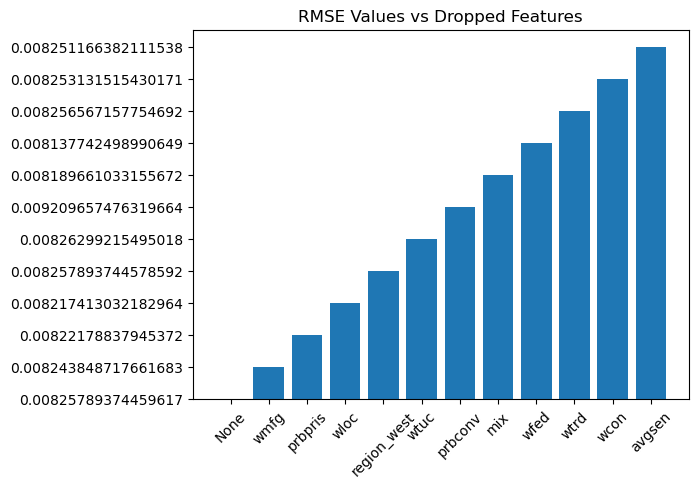

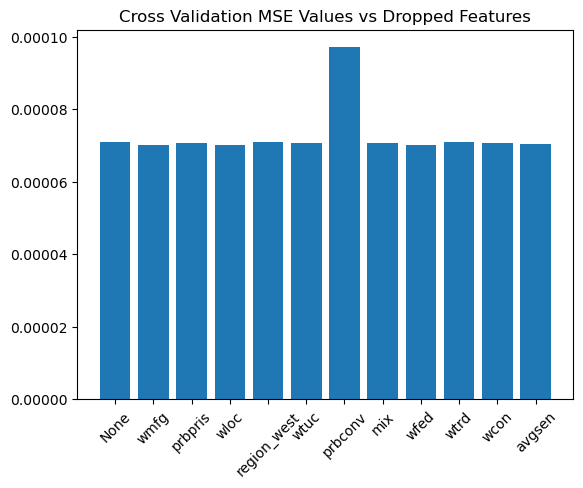

In [167]:
from sklearn.model_selection import cross_val_score

rmseVals = []
cv_scores = []
droppedFeatures = []

# Features are dropped based on p-value, R-Squared and AIC figures.
features2Drop = ['crmrte', 'smsa', 'county']

y = crimeData['crmrte']
X = crimeData.drop(features2Drop, axis=1)

rmseVals.append(calculateRMSE(X, y))
droppedFeatures.append('None')
scores = cross_val_score(LinearRegression(),
                         X, y, cv=10, scoring='neg_mean_squared_error')
cv_scores.append(-1*scores.mean())

# 'wmfg', 'prbpris', 'wloc', 'west', 'wtuc' are dropped in the previous model
features2Test = ['wmfg', 'prbpris', 'wloc', 'region_west', 'wtuc',
                 'prbconv', 'mix', 'wfed', 'wtrd', 'wcon', 'avgsen']

for feature in features2Test:
    features2Drop.append(feature)
    X = crimeData.drop(features2Drop, axis=1)
    features2Drop.remove(feature)
    rmseVals.append(calculateRMSE(X, y, feature))
    droppedFeatures.append(feature)

    scores = cross_val_score(LinearRegression(),
                             X, y, cv=10, scoring='neg_mean_squared_error')
    cv_scores.append(-1*scores.mean())

# print(droppedFeatures)
# print(cv_scores)

plt.bar(droppedFeatures, rmseVals)
plt.title('RMSE Values vs Dropped Features')
plt.xticks(rotation=45)
plt.show()

plt.bar(droppedFeatures, cv_scores)
plt.title('Cross Validation MSE Values vs Dropped Features')
plt.xticks(rotation=45)
plt.show()


From the bar chart, the RMSE values performs better than 'None' when wtuc, wtrd, wloc, region_west, wmfg and avgsen are removed. Thus, in addition to the previous model, **wtrd & avgsen features are removed.** But the R-squared and AIC figures degrade when both the features are removed. Since wtrd has a higher p value, **we will remove wtrd in our model.**

The lowest cross validation MSE is for wloc, wtrd, prbconv and wcon. Thus, in addition to the previous exclusions, prbconv & wcon also can be dropped. But removal of either feature would increase the RMSE value as per the above plot. Thus, we will remove only wtrd in our model.

# OLS Regression Characteristic of Final Model

In [170]:
y = crimeData['crmrte']
# Features are dropped based on p-value, R-Squared and AIC figures.
X = crimeData.drop(['crmrte', 'region_other', 'county',
                    'wmfg', 'prbpris', 'wloc',
                    'region_west', 'wtuc', 'wtrd'], axis=1)

# without a constant we are forcing our model to go through the origin
X = sm.add_constant(X) # To add an intercept to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 crmrte   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     154.6
Date:                Sat, 02 Nov 2024   Prob (F-statistic):          3.52e-189
Time:                        19:36:58   Log-Likelihood:                 1953.6
No. Observations:                 555   AIC:                            -3873.
Df Residuals:                     538   BIC:                            -3800.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0302      0.004      7.282      0.000       0.022       0.038
prbarr            -0.0513      0.004    -13.768      0.000      -0.059      -0.044
prbconv           -0.0275      0.002    -12.346      0.000      -0.032      -0.023
avgsen         -8.347e-05      0.000     -0.639      0.523      -0.000       0.000
polpc              4.3124      0.687      6.281      0.000       2.964       5.661
density            0.0058      0.000     12.386      0.000       0.005       0.007
taxpc              0.0002   3.45e-05      5.803      0.000       0.000       0.000
smsa              -0.0046      0.002     -2.327      0.020      -0.008      -0.001
pctmin             0.0003   2.11e-05     15.055      0.000       0.000       0.000
wcon            1.207e-06   2.54e-06      0.475      0.635   -3.79e-06     6.2e-06
wfir            2.575e-06   8.92e-06      0.289      0.773   -1.49e-05    2.01e-05
wser           -5.147e-06   4.68e-06     -1.100      0.272   -1.43e-05    4.04e-06
wfed            2.279e-05    8.3e-06      2.745      0.006    6.48e-06    3.91e-05
wsta           -3.263e-05   7.32e-06     -4.460      0.000    -4.7e-05   -1.83e-05
mix               -0.0068      0.005     -1.411      0.159      -0.016       0.003
pctymle            0.0526      0.014      3.758      0.000       0.025       0.080
region_central    -0.0012      0.001     -1.597      0.111      -0.003       0.000
==============================================================================
Omnibus:                       31.770   Durbin-Watson:                   0.848
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.076
Skew:                           0.500   Prob(JB):                     1.20e-09
Kurtosis:                       3.882   Cond. No.                     1.50e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Testing the Model on Input Data

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from statistics import mean, median

def linearReg(x_train, y_train, x_test, y_test):
    lm = LinearRegression()
    lm.fit(x_train, y_train)

    y_pred = lm.predict(x_test)

    # Plotting the results
    plt.scatter(y_test, y_pred)
    plt.xlabel(r"Actual Crime Rate: $Y_i$")
    plt.ylabel(r"Predicted Crime Rate: $\hat{Y}_i$")
    plt.title(r"Actual Crime Rate vs Predicted Crime Rate: $Y_i$ vs $\hat{Y}_i$")
    plt.show()

    # Calculate MAE, MSE, RMSE
    print("Mean Absolute Error (MAE) = " + str(metrics.mean_absolute_error(y_test, y_pred)))
    print("Mean Squared Error (MSE) = " + str(metrics.mean_squared_error(y_test, y_pred)))
    print("Root Mean Squared Error (RMSE) = " + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

    print("Explained Variance = " + str(metrics.explained_variance_score(y_test, y_pred)))

    # Calculating the error
    delta_y = y_test - y_pred
    print("Median Absolute Error = " + str(median(abs(delta_y))))

Train Data Shape:
(388, 15) (388,)
Test Data Shape:
(167, 15) (167,)


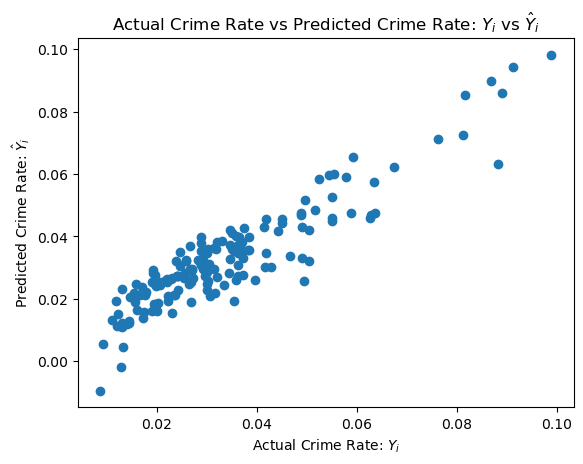

Mean Absolute Error (MAE) = 0.0053095548805566035
Mean Squared Error (MSE) = 4.8282004522243544e-05
Root Mean Squared Error (RMSE) = 0.0069485253487516
Explained Variance = 0.8457202288768143
Median Absolute Error = 0.003909863694140307


In [122]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from statistics import mean, median
import pandas as pd

# Assuming crimeData is a pandas DataFrame
# Example: crimeData = pd.read_csv('crime_data.csv')

def linearReg(x_train, y_train, x_test, y_test):
    lm = LinearRegression()
    lm.fit(x_train, y_train)

    y_pred = lm.predict(x_test)

    # Plotting the results
    plt.scatter(y_test, y_pred)
    plt.xlabel(r"Actual Crime Rate: $Y_i$")
    plt.ylabel(r"Predicted Crime Rate: $\hat{Y}_i$")
    plt.title(r"Actual Crime Rate vs Predicted Crime Rate: $Y_i$ vs $\hat{Y}_i$")
    plt.show()

    # Calculate MAE, MSE, RMSE
    print("Mean Absolute Error (MAE) = " + str(metrics.mean_absolute_error(y_test, y_pred)))
    print("Mean Squared Error (MSE) = " + str(metrics.mean_squared_error(y_test, y_pred)))
    print("Root Mean Squared Error (RMSE) = " + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

    print("Explained Variance = " + str(metrics.explained_variance_score(y_test, y_pred)))

    # Calculating the error
    delta_y = y_test - y_pred
    print("Median Absolute Error = " + str(median(abs(delta_y))))

# Assuming crimeData is already defined and loaded
y = crimeData['crmrte']
X = crimeData.drop(['crmrte', 'region_other', 'county',
                    'wmfg', 'prbpris', 'wloc',
                    'region_west', 'wtuc', 'wtrd', 'wcon'], axis=1)

# Create training and testing data: 70/30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print('Train Data Shape:')
print(X_train.shape, y_train.shape)
print('Test Data Shape:')
print(X_test.shape, y_test.shape)

linearReg(X_train, y_train, X_test, y_test)


## **Conclusion**

a) The model demonstrates a strong predictive capability with an explained variance of 0.8457, indicating that a significant portion of the variance in crime rates is captured by the model.

b) The low RMSE of 0.0069 suggests that the model's predictions are close to the actual values, reflecting its accuracy.

c) Further improvements could be achieved by exploring additional features, such as socioeconomic factors or geographic indicators.

d) Feature engineering, such as interaction terms or polynomial features, might enhance the model's perfo
Overall, the analysis provides valuable insights into the factors influencing crime rates, and the model shows promising accuracy with potential for further refinement.